In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA

In [2]:
dfBCCA = pd.read_table('C:/Users/Jesus Eduardo/Documents/BCCA/expr_matrix_BCCA_gene_RPKM.tsv')

In [3]:
dfBCCA 

,gene,TARGET_10_PAMXHJ,TARGET_10_PAMXSP,TARGET_10_PANEUH,TARGET_10_PANJPG,TARGET_10_PANJWJ,TARGET_10_PANKAK,TARGET_10_PANKGK,TARGET_10_PANLIC,TARGET_10_PANPJI,...,TARGET_10_PARMSP,TARGET_10_PARPNM,TARGET_10_PARPRW,TARGET_10_PARSZH,TARGET_10_PARUGP,TARGET_10_PARVWD,TARGET_10_PARXMC,TARGET_10_PASKAY,TARGET_10_PASUBW,TARGET_10_PATCTI
0,ENSG00000000457,3.5612,0.6947,2.1277,2.5922,1.7302,2.1039,0.7947,3.4643,1.4397,...,0.5402,3.7830,1.2813,0.9165,1.0207,0.6424,0.7051,5.6577,0.2852,1.3379
1,ENSG00000000460,2.0223,0.9486,0.4577,1.7828,1.0656,3.0066,0.3889,2.8612,1.0451,...,0.3264,4.1634,1.6625,1.2499,1.3542,1.0689,1.1454,6.3931,1.0663,4.6908
2,ENSG00000000938,1.0762,5.4575,0.4955,2.9056,10.5582,1.6140,1.1130,0.6086,3.1115,...,0.6013,2.8521,5.1208,4.0554,1.6845,0.6520,0.6726,15.0490,0.2003,14.1226
3,ENSG00000000971,0.0152,0.0310,0.0027,0.0496,0.9638,0.1200,0.0792,0.1089,0.2116,...,0.0024,0.0034,0.0280,0.0078,0.0654,0.0076,0.1610,0.0870,0.0000,0.0911
4,ENSG00000001460,0.4217,0.2452,0.1324,0.5134,0.2652,0.6087,0.0989,1.0427,0.0952,...,0.2497,1.4248,0.4709,0.9746,0.1386,0.1331,0.0308,0.9201,0.2757,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58445,ENSG00000263502,0.0803,0.0000,0.0000,0.0000,0.3455,0.0023,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0802,0.0000,0.0000
58446,ENSG00000265161,0.0000,0.0794,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
58447,ENSG00000265197,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
58448,ENSG00000266220,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [4]:
dfCL= pd.read_table('C:/Users/Jesus Eduardo/Documents/BCCA/clinical_added_cols.tsv')

In [5]:
dfCL

,samples,TARGET.USI,Gender,Race,Ethnicity,Age.at.Diagnosis.in.Days,First.Event,Event.Free.Survival.Time.in.Days,Vital.Status,Overall.Survival.Time.in.Days,...,Alternate.Therapy.Other,Cell.of.Origin,ALL.Molecular.Subtype,ALL.Gene.Expression.Subtype,Comment,fusions,condition,first_event,os_status,relapse
0,TARGET_10_PAMXHJ,TARGET-10-PAMXHJ,Male,White,Hispanic or Latino,2219,NaN,4089,Alive,4089,...,NaN,B-Precursor,Trisomy of both chromosomes 4 and 10,NaN,NaN,unknown,Up,0,0,0
1,TARGET_10_PAMXSP,TARGET-10-PAMXSP,Male,White,Hispanic or Latino,1223,NaN,4383,Alive,4383,...,NaN,B-Precursor,Hyperdiploidy without trisomy of both chromsom...,NaN,NaN,unknown,other,0,0,0
2,TARGET_10_PANEUH,TARGET-10-PANEUH,Male,White,Not Hispanic or Latino,648,NaN,4132,Alive,4132,...,NaN,B-Precursor,Trisomy of both chromosomes 4 and 10,NaN,NaN,unknown,other,0,0,0
3,TARGET_10_PANJPG,TARGET-10-PANJPG,Female,White,Not Hispanic or Latino,4810,NaN,4072,Alive,4072,...,NaN,B-Precursor,None of the above,NaN,NaN,unknown,other,0,0,0
4,TARGET_10_PANJWJ,TARGET-10-PANJWJ,Male,White,Not Hispanic or Latino,4018,Relapse,689,Alive,3684,...,NaN,B-Precursor,BCR-ABL1,NaN,NaN,BCR_ABL1,other,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,TARGET_10_PARVWD,TARGET-10-PARVWD,Male,Black or African American,Not Hispanic or Latino,6375,Relapse,252,Dead,255,...,NaN,B-Precursor,None of the above,NaN,NaN,unknown,Down,1,1,1
78,TARGET_10_PARXMC,TARGET-10-PARXMC,Female,Unknown,Hispanic or Latino,2526,Relapse,672,Alive,2818,...,NaN,B-Precursor,ETV6-RUNX1,NaN,NaN,ETV6_RUNX1,Down,1,0,1
79,TARGET_10_PASKAY,TARGET-10-PASKAY,Male,Black or African American,Not Hispanic or Latino,585,Relapse,312,Dead,487,...,NaN,B-Precursor,Trisomy of both chromosomes 4 and 10,NaN,Need to review DNA index and FISH,unknown,Up,1,1,1
80,TARGET_10_PASUBW,TARGET-10-PASUBW,Male,White,Not Hispanic or Latino,5098,Relapse,336,Dead,474,...,NaN,B-Precursor,None of the above,NaN,NaN,unknown,Down,1,1,1


In [6]:
dfCL[["samples","ALL.Molecular.Subtype"]]

,samples,ALL.Molecular.Subtype
0,TARGET_10_PAMXHJ,Trisomy of both chromosomes 4 and 10
1,TARGET_10_PAMXSP,Hyperdiploidy without trisomy of both chromsom...
2,TARGET_10_PANEUH,Trisomy of both chromosomes 4 and 10
3,TARGET_10_PANJPG,None of the above
4,TARGET_10_PANJWJ,BCR-ABL1
...,...,...
77,TARGET_10_PARVWD,None of the above
78,TARGET_10_PARXMC,ETV6-RUNX1
79,TARGET_10_PASKAY,Trisomy of both chromosomes 4 and 10
80,TARGET_10_PASUBW,None of the above


In [7]:
dfCL[["ALL.Molecular.Subtype"]].value_counts()

ALL.Molecular.Subtype                                    
None of the above                                            42
Hyperdiploidy without trisomy of both chromsomes 4 and 10    10
ETV6-RUNX1                                                    8
Trisomy of both chromosomes 4 and 10                          8
TCF3-PBX1                                                     7
BCR-ABL1                                                      3
iAMP21                                                        2
Hyperdiploid; status of 4 and 10 unknown                      1
TCF3-HLF                                                      1
Name: count, dtype: int64

In [8]:
dfCL_C=dfCL.copy()

In [9]:
# Reemplaza y hacemos un solo hiperdiploidia. 
dfCL_C['ALL.Molecular.Subtype'] = dfCL_C['ALL.Molecular.Subtype'].replace({'Hyperdiploidy without trisomy of both chromsomes 4 and 10': 'Hiperdiploidia', 'Hyperdiploid; status of 4 and 10 unknown': 'Hiperdiploidia'})
dfCL_C

,samples,TARGET.USI,Gender,Race,Ethnicity,Age.at.Diagnosis.in.Days,First.Event,Event.Free.Survival.Time.in.Days,Vital.Status,Overall.Survival.Time.in.Days,...,Alternate.Therapy.Other,Cell.of.Origin,ALL.Molecular.Subtype,ALL.Gene.Expression.Subtype,Comment,fusions,condition,first_event,os_status,relapse
0,TARGET_10_PAMXHJ,TARGET-10-PAMXHJ,Male,White,Hispanic or Latino,2219,NaN,4089,Alive,4089,...,NaN,B-Precursor,Trisomy of both chromosomes 4 and 10,NaN,NaN,unknown,Up,0,0,0
1,TARGET_10_PAMXSP,TARGET-10-PAMXSP,Male,White,Hispanic or Latino,1223,NaN,4383,Alive,4383,...,NaN,B-Precursor,Hiperdiploidia,NaN,NaN,unknown,other,0,0,0
2,TARGET_10_PANEUH,TARGET-10-PANEUH,Male,White,Not Hispanic or Latino,648,NaN,4132,Alive,4132,...,NaN,B-Precursor,Trisomy of both chromosomes 4 and 10,NaN,NaN,unknown,other,0,0,0
3,TARGET_10_PANJPG,TARGET-10-PANJPG,Female,White,Not Hispanic or Latino,4810,NaN,4072,Alive,4072,...,NaN,B-Precursor,None of the above,NaN,NaN,unknown,other,0,0,0
4,TARGET_10_PANJWJ,TARGET-10-PANJWJ,Male,White,Not Hispanic or Latino,4018,Relapse,689,Alive,3684,...,NaN,B-Precursor,BCR-ABL1,NaN,NaN,BCR_ABL1,other,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,TARGET_10_PARVWD,TARGET-10-PARVWD,Male,Black or African American,Not Hispanic or Latino,6375,Relapse,252,Dead,255,...,NaN,B-Precursor,None of the above,NaN,NaN,unknown,Down,1,1,1
78,TARGET_10_PARXMC,TARGET-10-PARXMC,Female,Unknown,Hispanic or Latino,2526,Relapse,672,Alive,2818,...,NaN,B-Precursor,ETV6-RUNX1,NaN,NaN,ETV6_RUNX1,Down,1,0,1
79,TARGET_10_PASKAY,TARGET-10-PASKAY,Male,Black or African American,Not Hispanic or Latino,585,Relapse,312,Dead,487,...,NaN,B-Precursor,Trisomy of both chromosomes 4 and 10,NaN,Need to review DNA index and FISH,unknown,Up,1,1,1
80,TARGET_10_PASUBW,TARGET-10-PASUBW,Male,White,Not Hispanic or Latino,5098,Relapse,336,Dead,474,...,NaN,B-Precursor,None of the above,NaN,NaN,unknown,Down,1,1,1


In [10]:
dfCL_C[["ALL.Molecular.Subtype"]].value_counts()

ALL.Molecular.Subtype               
None of the above                       42
Hiperdiploidia                          11
ETV6-RUNX1                               8
Trisomy of both chromosomes 4 and 10     8
TCF3-PBX1                                7
BCR-ABL1                                 3
iAMP21                                   2
TCF3-HLF                                 1
Name: count, dtype: int64

In [11]:
dfCL_C[["samples","ALL.Molecular.Subtype"]]

,samples,ALL.Molecular.Subtype
0,TARGET_10_PAMXHJ,Trisomy of both chromosomes 4 and 10
1,TARGET_10_PAMXSP,Hiperdiploidia
2,TARGET_10_PANEUH,Trisomy of both chromosomes 4 and 10
3,TARGET_10_PANJPG,None of the above
4,TARGET_10_PANJWJ,BCR-ABL1
...,...,...
77,TARGET_10_PARVWD,None of the above
78,TARGET_10_PARXMC,ETV6-RUNX1
79,TARGET_10_PASKAY,Trisomy of both chromosomes 4 and 10
80,TARGET_10_PASUBW,None of the above


In [12]:
dfBCCA_c=dfBCCA.copy()#hacemos copia

In [13]:
dfBCCA_c.set_index(dfBCCA_c.columns[0], inplace=True)#quitamos indices. 
dfBCCA_c

,TARGET_10_PAMXHJ,TARGET_10_PAMXSP,TARGET_10_PANEUH,TARGET_10_PANJPG,TARGET_10_PANJWJ,TARGET_10_PANKAK,TARGET_10_PANKGK,TARGET_10_PANLIC,TARGET_10_PANPJI,TARGET_10_PANRWG,...,TARGET_10_PARMSP,TARGET_10_PARPNM,TARGET_10_PARPRW,TARGET_10_PARSZH,TARGET_10_PARUGP,TARGET_10_PARVWD,TARGET_10_PARXMC,TARGET_10_PASKAY,TARGET_10_PASUBW,TARGET_10_PATCTI
gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000457,3.5612,0.6947,2.1277,2.5922,1.7302,2.1039,0.7947,3.4643,1.4397,2.3212,...,0.5402,3.7830,1.2813,0.9165,1.0207,0.6424,0.7051,5.6577,0.2852,1.3379
ENSG00000000460,2.0223,0.9486,0.4577,1.7828,1.0656,3.0066,0.3889,2.8612,1.0451,2.7693,...,0.3264,4.1634,1.6625,1.2499,1.3542,1.0689,1.1454,6.3931,1.0663,4.6908
ENSG00000000938,1.0762,5.4575,0.4955,2.9056,10.5582,1.6140,1.1130,0.6086,3.1115,16.6792,...,0.6013,2.8521,5.1208,4.0554,1.6845,0.6520,0.6726,15.0490,0.2003,14.1226
ENSG00000000971,0.0152,0.0310,0.0027,0.0496,0.9638,0.1200,0.0792,0.1089,0.2116,0.0538,...,0.0024,0.0034,0.0280,0.0078,0.0654,0.0076,0.1610,0.0870,0.0000,0.0911
ENSG00000001460,0.4217,0.2452,0.1324,0.5134,0.2652,0.6087,0.0989,1.0427,0.0952,0.3243,...,0.2497,1.4248,0.4709,0.9746,0.1386,0.1331,0.0308,0.9201,0.2757,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000263502,0.0803,0.0000,0.0000,0.0000,0.3455,0.0023,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0802,0.0000,0.0000
ENSG00000265161,0.0000,0.0794,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ENSG00000265197,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [14]:
dfBCCA_c_transpuesto = dfBCCA_c.transpose()#transponesmos
dfBCCA_c_transpuesto

gene,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001460,ENSG00000001461,ENSG00000004455,ENSG00000004487,ENSG00000006555,ENSG00000007341,...,ENSG00000258992,ENSG00000259029,ENSG00000259154,ENSG00000259247,ENSG00000260197,ENSG00000263502,ENSG00000265161,ENSG00000265197,ENSG00000266220,ENSG00000267793
TARGET_10_PAMXHJ,3.5612,2.0223,1.0762,0.0152,0.4217,2.7360,11.9597,37.1308,0.0081,2.0573,...,0.0,0.00,0.0,0.0,7.7778,0.0803,0.0000,0.0,0.0,8.0448
TARGET_10_PAMXSP,0.6947,0.9486,5.4575,0.0310,0.2452,1.9951,9.9289,35.7941,0.0133,0.9874,...,0.0,0.01,0.0,0.0,6.9733,0.0000,0.0794,0.0,0.0,4.3667
TARGET_10_PANEUH,2.1277,0.4577,0.4955,0.0027,0.1324,1.0800,5.8872,31.5568,0.0072,1.2895,...,0.0,0.00,0.0,0.0,7.4178,0.0000,0.0000,0.0,0.0,1.6695
TARGET_10_PANJPG,2.5922,1.7828,2.9056,0.0496,0.5134,2.2516,10.1409,28.9609,0.1038,2.1603,...,0.0,0.00,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0000
TARGET_10_PANJWJ,1.7302,1.0656,10.5582,0.9638,0.2652,2.6493,14.6889,28.2195,0.0433,3.0594,...,0.0,0.00,0.0,0.0,9.9479,0.3455,0.0000,0.0,0.0,2.9667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TARGET_10_PARVWD,0.6424,1.0689,0.6520,0.0076,0.1331,0.6489,3.3390,54.4165,0.0367,1.3298,...,0.0,0.00,0.0,0.0,6.1081,0.0000,0.0000,0.0,0.0,0.2793
TARGET_10_PARXMC,0.7051,1.1454,0.6726,0.1610,0.0308,0.3309,2.5228,51.3583,0.0322,1.9252,...,0.0,0.00,0.0,0.0,0.0078,0.0000,0.0000,0.0,0.0,0.0000
TARGET_10_PASKAY,5.6577,6.3931,15.0490,0.0870,0.9201,3.8215,14.7113,49.2742,0.1746,2.0578,...,0.0,0.00,0.0,0.0,0.7222,0.0802,0.0000,0.0,0.0,0.0437
TARGET_10_PASUBW,0.2852,1.0663,0.2003,0.0000,0.2757,0.5336,10.9376,41.1611,0.0088,0.6457,...,0.0,0.00,0.0,0.0,0.1923,0.0000,0.0000,0.0,0.0,0.0000


In [15]:
dfBCCA_c_transpuesto.columns

Index(['ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001460', 'ENSG00000001461',
       'ENSG00000004455', 'ENSG00000004487', 'ENSG00000006555',
       'ENSG00000007341',
       ...
       'ENSG00000258992', 'ENSG00000259029', 'ENSG00000259154',
       'ENSG00000259247', 'ENSG00000260197', 'ENSG00000263502',
       'ENSG00000265161', 'ENSG00000265197', 'ENSG00000266220',
       'ENSG00000267793'],
      dtype='object', name='gene', length=58450)

In [16]:
Caracteristicas = dfBCCA_c_transpuesto.columns
Caracteristicas

Index(['ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001460', 'ENSG00000001461',
       'ENSG00000004455', 'ENSG00000004487', 'ENSG00000006555',
       'ENSG00000007341',
       ...
       'ENSG00000258992', 'ENSG00000259029', 'ENSG00000259154',
       'ENSG00000259247', 'ENSG00000260197', 'ENSG00000263502',
       'ENSG00000265161', 'ENSG00000265197', 'ENSG00000266220',
       'ENSG00000267793'],
      dtype='object', name='gene', length=58450)

Filtrar y eliminar columnas que tengan 0 en toda la columna. 

In [17]:
dfBCCA_c_transpuesto_filtrado = dfBCCA_c_transpuesto.loc[:, (dfBCCA_c_transpuesto != 0).any()]
dfBCCA_c_transpuesto_filtrado

gene,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001460,ENSG00000001461,ENSG00000004455,ENSG00000004487,ENSG00000006555,ENSG00000007341,...,ENSG00000258567,ENSG00000258991,ENSG00000258992,ENSG00000259029,ENSG00000259154,ENSG00000259247,ENSG00000260197,ENSG00000263502,ENSG00000265161,ENSG00000267793
TARGET_10_PAMXHJ,3.5612,2.0223,1.0762,0.0152,0.4217,2.7360,11.9597,37.1308,0.0081,2.0573,...,0.0,0.0,0.0,0.00,0.0,0.0,7.7778,0.0803,0.0000,8.0448
TARGET_10_PAMXSP,0.6947,0.9486,5.4575,0.0310,0.2452,1.9951,9.9289,35.7941,0.0133,0.9874,...,0.0,0.0,0.0,0.01,0.0,0.0,6.9733,0.0000,0.0794,4.3667
TARGET_10_PANEUH,2.1277,0.4577,0.4955,0.0027,0.1324,1.0800,5.8872,31.5568,0.0072,1.2895,...,0.0,0.0,0.0,0.00,0.0,0.0,7.4178,0.0000,0.0000,1.6695
TARGET_10_PANJPG,2.5922,1.7828,2.9056,0.0496,0.5134,2.2516,10.1409,28.9609,0.1038,2.1603,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0000,0.0000,0.0000,0.0000
TARGET_10_PANJWJ,1.7302,1.0656,10.5582,0.9638,0.2652,2.6493,14.6889,28.2195,0.0433,3.0594,...,0.0,0.0,0.0,0.00,0.0,0.0,9.9479,0.3455,0.0000,2.9667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TARGET_10_PARVWD,0.6424,1.0689,0.6520,0.0076,0.1331,0.6489,3.3390,54.4165,0.0367,1.3298,...,0.0,0.0,0.0,0.00,0.0,0.0,6.1081,0.0000,0.0000,0.2793
TARGET_10_PARXMC,0.7051,1.1454,0.6726,0.1610,0.0308,0.3309,2.5228,51.3583,0.0322,1.9252,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0078,0.0000,0.0000,0.0000
TARGET_10_PASKAY,5.6577,6.3931,15.0490,0.0870,0.9201,3.8215,14.7113,49.2742,0.1746,2.0578,...,0.0,0.0,0.0,0.00,0.0,0.0,0.7222,0.0802,0.0000,0.0437
TARGET_10_PASUBW,0.2852,1.0663,0.2003,0.0000,0.2757,0.5336,10.9376,41.1611,0.0088,0.6457,...,0.0,0.0,0.0,0.00,0.0,0.0,0.1923,0.0000,0.0000,0.0000


In [18]:
 58450-53070

5380

**se eliminaron 5380 columnas que contenian cero en todas las filas de la columna**

In [19]:
dfCL_C_mer=dfCL_C[["samples","ALL.Molecular.Subtype"]]
dfCL_C_mer

,samples,ALL.Molecular.Subtype
0,TARGET_10_PAMXHJ,Trisomy of both chromosomes 4 and 10
1,TARGET_10_PAMXSP,Hiperdiploidia
2,TARGET_10_PANEUH,Trisomy of both chromosomes 4 and 10
3,TARGET_10_PANJPG,None of the above
4,TARGET_10_PANJWJ,BCR-ABL1
...,...,...
77,TARGET_10_PARVWD,None of the above
78,TARGET_10_PARXMC,ETV6-RUNX1
79,TARGET_10_PASKAY,Trisomy of both chromosomes 4 and 10
80,TARGET_10_PASUBW,None of the above


Empezando el merge! para la combinacion tomando como llave la tabla "dfCL_C_merge"

In [20]:
merged_dfBCCA_c_transpuesto_filtrado = dfCL_C_mer.merge(dfBCCA_c_transpuesto_filtrado, left_on='samples', right_index=True)
merged_dfBCCA_c_transpuesto_filtrado

,samples,ALL.Molecular.Subtype,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001460,ENSG00000001461,ENSG00000004455,ENSG00000004487,...,ENSG00000258567,ENSG00000258991,ENSG00000258992,ENSG00000259029,ENSG00000259154,ENSG00000259247,ENSG00000260197,ENSG00000263502,ENSG00000265161,ENSG00000267793
0,TARGET_10_PAMXHJ,Trisomy of both chromosomes 4 and 10,3.5612,2.0223,1.0762,0.0152,0.4217,2.7360,11.9597,37.1308,...,0.0,0.0,0.0,0.00,0.0,0.0,7.7778,0.0803,0.0000,8.0448
1,TARGET_10_PAMXSP,Hiperdiploidia,0.6947,0.9486,5.4575,0.0310,0.2452,1.9951,9.9289,35.7941,...,0.0,0.0,0.0,0.01,0.0,0.0,6.9733,0.0000,0.0794,4.3667
2,TARGET_10_PANEUH,Trisomy of both chromosomes 4 and 10,2.1277,0.4577,0.4955,0.0027,0.1324,1.0800,5.8872,31.5568,...,0.0,0.0,0.0,0.00,0.0,0.0,7.4178,0.0000,0.0000,1.6695
3,TARGET_10_PANJPG,None of the above,2.5922,1.7828,2.9056,0.0496,0.5134,2.2516,10.1409,28.9609,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0000,0.0000,0.0000,0.0000
4,TARGET_10_PANJWJ,BCR-ABL1,1.7302,1.0656,10.5582,0.9638,0.2652,2.6493,14.6889,28.2195,...,0.0,0.0,0.0,0.00,0.0,0.0,9.9479,0.3455,0.0000,2.9667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,TARGET_10_PARVWD,None of the above,0.6424,1.0689,0.6520,0.0076,0.1331,0.6489,3.3390,54.4165,...,0.0,0.0,0.0,0.00,0.0,0.0,6.1081,0.0000,0.0000,0.2793
78,TARGET_10_PARXMC,ETV6-RUNX1,0.7051,1.1454,0.6726,0.1610,0.0308,0.3309,2.5228,51.3583,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0078,0.0000,0.0000,0.0000
79,TARGET_10_PASKAY,Trisomy of both chromosomes 4 and 10,5.6577,6.3931,15.0490,0.0870,0.9201,3.8215,14.7113,49.2742,...,0.0,0.0,0.0,0.00,0.0,0.0,0.7222,0.0802,0.0000,0.0437
80,TARGET_10_PASUBW,None of the above,0.2852,1.0663,0.2003,0.0000,0.2757,0.5336,10.9376,41.1611,...,0.0,0.0,0.0,0.00,0.0,0.0,0.1923,0.0000,0.0000,0.0000


Reviso nuevmente si las columnas tienen 0 en todas sus columnas del merge. 

In [21]:
columnas_con_ceros = merged_dfBCCA_c_transpuesto_filtrado.columns[(merged_dfBCCA_c_transpuesto_filtrado == 0).all()]
print(f"Columnas con todos los valores 0: {list(columnas_con_ceros)}")

Columnas con todos los valores 0: []


al parecer no hay columnas con todos lo valores 0. Entonces con esta matriz se trabajara. 

In [22]:
dfBCCA_final = merged_dfBCCA_c_transpuesto_filtrado.copy()
dfBCCA_final

,samples,ALL.Molecular.Subtype,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001460,ENSG00000001461,ENSG00000004455,ENSG00000004487,...,ENSG00000258567,ENSG00000258991,ENSG00000258992,ENSG00000259029,ENSG00000259154,ENSG00000259247,ENSG00000260197,ENSG00000263502,ENSG00000265161,ENSG00000267793
0,TARGET_10_PAMXHJ,Trisomy of both chromosomes 4 and 10,3.5612,2.0223,1.0762,0.0152,0.4217,2.7360,11.9597,37.1308,...,0.0,0.0,0.0,0.00,0.0,0.0,7.7778,0.0803,0.0000,8.0448
1,TARGET_10_PAMXSP,Hiperdiploidia,0.6947,0.9486,5.4575,0.0310,0.2452,1.9951,9.9289,35.7941,...,0.0,0.0,0.0,0.01,0.0,0.0,6.9733,0.0000,0.0794,4.3667
2,TARGET_10_PANEUH,Trisomy of both chromosomes 4 and 10,2.1277,0.4577,0.4955,0.0027,0.1324,1.0800,5.8872,31.5568,...,0.0,0.0,0.0,0.00,0.0,0.0,7.4178,0.0000,0.0000,1.6695
3,TARGET_10_PANJPG,None of the above,2.5922,1.7828,2.9056,0.0496,0.5134,2.2516,10.1409,28.9609,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0000,0.0000,0.0000,0.0000
4,TARGET_10_PANJWJ,BCR-ABL1,1.7302,1.0656,10.5582,0.9638,0.2652,2.6493,14.6889,28.2195,...,0.0,0.0,0.0,0.00,0.0,0.0,9.9479,0.3455,0.0000,2.9667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,TARGET_10_PARVWD,None of the above,0.6424,1.0689,0.6520,0.0076,0.1331,0.6489,3.3390,54.4165,...,0.0,0.0,0.0,0.00,0.0,0.0,6.1081,0.0000,0.0000,0.2793
78,TARGET_10_PARXMC,ETV6-RUNX1,0.7051,1.1454,0.6726,0.1610,0.0308,0.3309,2.5228,51.3583,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0078,0.0000,0.0000,0.0000
79,TARGET_10_PASKAY,Trisomy of both chromosomes 4 and 10,5.6577,6.3931,15.0490,0.0870,0.9201,3.8215,14.7113,49.2742,...,0.0,0.0,0.0,0.00,0.0,0.0,0.7222,0.0802,0.0000,0.0437
80,TARGET_10_PASUBW,None of the above,0.2852,1.0663,0.2003,0.0000,0.2757,0.5336,10.9376,41.1611,...,0.0,0.0,0.0,0.00,0.0,0.0,0.1923,0.0000,0.0000,0.0000


In [23]:
dfBCCA_final.reset_index(drop=True, inplace=True)# reseteando los indices de 0 a n-1 ya que surgio un error a la hora de plotear. 
dfBCCA_final

,samples,ALL.Molecular.Subtype,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001460,ENSG00000001461,ENSG00000004455,ENSG00000004487,...,ENSG00000258567,ENSG00000258991,ENSG00000258992,ENSG00000259029,ENSG00000259154,ENSG00000259247,ENSG00000260197,ENSG00000263502,ENSG00000265161,ENSG00000267793
0,TARGET_10_PAMXHJ,Trisomy of both chromosomes 4 and 10,3.5612,2.0223,1.0762,0.0152,0.4217,2.7360,11.9597,37.1308,...,0.0,0.0,0.0,0.00,0.0,0.0,7.7778,0.0803,0.0000,8.0448
1,TARGET_10_PAMXSP,Hiperdiploidia,0.6947,0.9486,5.4575,0.0310,0.2452,1.9951,9.9289,35.7941,...,0.0,0.0,0.0,0.01,0.0,0.0,6.9733,0.0000,0.0794,4.3667
2,TARGET_10_PANEUH,Trisomy of both chromosomes 4 and 10,2.1277,0.4577,0.4955,0.0027,0.1324,1.0800,5.8872,31.5568,...,0.0,0.0,0.0,0.00,0.0,0.0,7.4178,0.0000,0.0000,1.6695
3,TARGET_10_PANJPG,None of the above,2.5922,1.7828,2.9056,0.0496,0.5134,2.2516,10.1409,28.9609,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0000,0.0000,0.0000,0.0000
4,TARGET_10_PANJWJ,BCR-ABL1,1.7302,1.0656,10.5582,0.9638,0.2652,2.6493,14.6889,28.2195,...,0.0,0.0,0.0,0.00,0.0,0.0,9.9479,0.3455,0.0000,2.9667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,TARGET_10_PARVWD,None of the above,0.6424,1.0689,0.6520,0.0076,0.1331,0.6489,3.3390,54.4165,...,0.0,0.0,0.0,0.00,0.0,0.0,6.1081,0.0000,0.0000,0.2793
78,TARGET_10_PARXMC,ETV6-RUNX1,0.7051,1.1454,0.6726,0.1610,0.0308,0.3309,2.5228,51.3583,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0078,0.0000,0.0000,0.0000
79,TARGET_10_PASKAY,Trisomy of both chromosomes 4 and 10,5.6577,6.3931,15.0490,0.0870,0.9201,3.8215,14.7113,49.2742,...,0.0,0.0,0.0,0.00,0.0,0.0,0.7222,0.0802,0.0000,0.0437
80,TARGET_10_PASUBW,None of the above,0.2852,1.0663,0.2003,0.0000,0.2757,0.5336,10.9376,41.1611,...,0.0,0.0,0.0,0.00,0.0,0.0,0.1923,0.0000,0.0000,0.0000


In [24]:
dfBCCA_final_PCA=merged_dfBCCA_c_transpuesto_filtrado.drop(['samples', 'ALL.Molecular.Subtype'], axis=1)
dfBCCA_final_PCA# limpiando las columnas samples y ALL.Molecular.Subtype. 

,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001460,ENSG00000001461,ENSG00000004455,ENSG00000004487,ENSG00000006555,ENSG00000007341,...,ENSG00000258567,ENSG00000258991,ENSG00000258992,ENSG00000259029,ENSG00000259154,ENSG00000259247,ENSG00000260197,ENSG00000263502,ENSG00000265161,ENSG00000267793
0,3.5612,2.0223,1.0762,0.0152,0.4217,2.7360,11.9597,37.1308,0.0081,2.0573,...,0.0,0.0,0.0,0.00,0.0,0.0,7.7778,0.0803,0.0000,8.0448
1,0.6947,0.9486,5.4575,0.0310,0.2452,1.9951,9.9289,35.7941,0.0133,0.9874,...,0.0,0.0,0.0,0.01,0.0,0.0,6.9733,0.0000,0.0794,4.3667
2,2.1277,0.4577,0.4955,0.0027,0.1324,1.0800,5.8872,31.5568,0.0072,1.2895,...,0.0,0.0,0.0,0.00,0.0,0.0,7.4178,0.0000,0.0000,1.6695
3,2.5922,1.7828,2.9056,0.0496,0.5134,2.2516,10.1409,28.9609,0.1038,2.1603,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0000,0.0000,0.0000,0.0000
4,1.7302,1.0656,10.5582,0.9638,0.2652,2.6493,14.6889,28.2195,0.0433,3.0594,...,0.0,0.0,0.0,0.00,0.0,0.0,9.9479,0.3455,0.0000,2.9667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.6424,1.0689,0.6520,0.0076,0.1331,0.6489,3.3390,54.4165,0.0367,1.3298,...,0.0,0.0,0.0,0.00,0.0,0.0,6.1081,0.0000,0.0000,0.2793
78,0.7051,1.1454,0.6726,0.1610,0.0308,0.3309,2.5228,51.3583,0.0322,1.9252,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0078,0.0000,0.0000,0.0000
79,5.6577,6.3931,15.0490,0.0870,0.9201,3.8215,14.7113,49.2742,0.1746,2.0578,...,0.0,0.0,0.0,0.00,0.0,0.0,0.7222,0.0802,0.0000,0.0437
80,0.2852,1.0663,0.2003,0.0000,0.2757,0.5336,10.9376,41.1611,0.0088,0.6457,...,0.0,0.0,0.0,0.00,0.0,0.0,0.1923,0.0000,0.0000,0.0000


In [25]:
Caracteristicas = dfBCCA_final_PCA.columns#guardando variables de las columnas
Caracteristicas# asignando variable a las columnas 

Index(['ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001460', 'ENSG00000001461',
       'ENSG00000004455', 'ENSG00000004487', 'ENSG00000006555',
       'ENSG00000007341',
       ...
       'ENSG00000258567', 'ENSG00000258991', 'ENSG00000258992',
       'ENSG00000259029', 'ENSG00000259154', 'ENSG00000259247',
       'ENSG00000260197', 'ENSG00000263502', 'ENSG00000265161',
       'ENSG00000267793'],
      dtype='object', length=53070)

**Usando PCA**

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = dfBCCA_final.loc[:, Caracteristicas].values
x = StandardScaler().fit_transform(x) # Normalizando caract.
x.shape

(82, 53070)

In [27]:
#Comprobando si los datos normalizados tienen una media de cero (.mean) y una desviación estándar de uno(.std).
np.mean(x),np.std(x)

(8.818024197940115e-19, 0.9999999999999999)

In [28]:
x_c= x.copy()#copia por que luego lo uso para tsne
x_c

array([[ 1.3735707 ,  0.22486042, -0.50625939, ...,  1.86750183,
        -0.16795709,  3.50993117],
       [-0.93836401, -0.66037027,  0.1588284 , ..., -0.15622191,
         0.60224647,  1.66248523],
       [ 0.21740171, -1.06510134, -0.5944105 , ..., -0.15622191,
        -0.16795709,  0.30772839],
       ...,
       [ 3.06447288,  3.82844272,  1.61483222, ...,  1.86498163,
        -0.16795709, -0.5088828 ],
       [-1.2686404 , -0.56333045, -0.6392223 , ..., -0.15622191,
        -0.16795709, -0.53083255],
       [-0.41960022,  2.42495179,  1.47420333, ..., -0.15622191,
        -0.16795709, -0.11032149]])

In [29]:
#Usando pca en dos dimensiones
pca_dfBCCA_final = PCA(n_components=2)
principalComponents_dfBCCA_final = pca_dfBCCA_final.fit_transform(x)

In [30]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dfBCCA_final = pd.DataFrame(data = principalComponents_dfBCCA_final
             , columns = ['Componente principal 1', 'Componente principal 2'])
principal_dfBCCA_final 

,Componente principal 1,Componente principal 2
0,-17.103105,7.920591
1,-9.044515,25.216551
2,-4.852910,35.996492
3,-17.010817,-0.688153
4,-18.299752,-10.144043
...,...,...
77,-16.481034,24.147164
78,12.731070,78.686666
79,-29.865847,-60.940535
80,-30.740158,-115.851323


In [31]:
print('Variación explicada por componente principal: {}'.format(pca_dfBCCA_final.explained_variance_ratio_))

Variación explicada por componente principal: [0.27491265 0.07108177]


Solo se conserva un 28% de la info

In [32]:
PCA_dfBCCA_final=principal_dfBCCA_final.copy()
PCA_dfBCCA_final

,Componente principal 1,Componente principal 2
0,-17.103105,7.920591
1,-9.044515,25.216551
2,-4.852910,35.996492
3,-17.010817,-0.688153
4,-18.299752,-10.144043
...,...,...
77,-16.481034,24.147164
78,12.731070,78.686666
79,-29.865847,-60.940535
80,-30.740158,-115.851323


In [33]:
PCA_dfBCCA_final['Etiqueta'] = dfBCCA_final['ALL.Molecular.Subtype']
PCA_dfBCCA_final

,Componente principal 1,Componente principal 2,Etiqueta
0,-17.103105,7.920591,Trisomy of both chromosomes 4 and 10
1,-9.044515,25.216551,Hiperdiploidia
2,-4.852910,35.996492,Trisomy of both chromosomes 4 and 10
3,-17.010817,-0.688153,None of the above
4,-18.299752,-10.144043,BCR-ABL1
...,...,...,...
77,-16.481034,24.147164,None of the above
78,12.731070,78.686666,ETV6-RUNX1
79,-29.865847,-60.940535,Trisomy of both chromosomes 4 and 10
80,-30.740158,-115.851323,None of the above


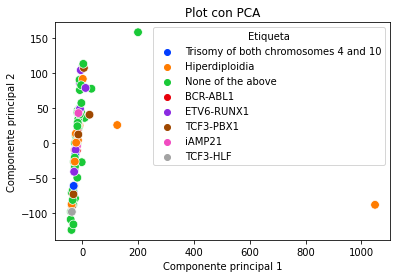

In [34]:
# Ploteando con pca y colores diferenciables según sus etiquetas.

sns.scatterplot(x='Componente principal 1', y='Componente principal 2', hue='Etiqueta', data=PCA_dfBCCA_final, palette='bright', legend='full', s=75)
plt.title('Plot con PCA')
plt.savefig('plot_PCA.png', dpi=300)
plt.show()

In [35]:
valor_mas_grande = PCA_dfBCCA_final['Componente principal 1'].max()
valor_mas_grande

1048.866670262694

In [36]:
fila_con_valor_max = PCA_dfBCCA_final.loc[PCA_dfBCCA_final['Componente principal 1'] == 1048.8666702629507]
fila_con_valor_max

,Componente principal 1,Componente principal 2,Etiqueta


In [37]:
indice_a_eliminar = 22
df_sin_fila_max = PCA_dfBCCA_final.drop(indice_a_eliminar)
df_sin_fila_max

,Componente principal 1,Componente principal 2,Etiqueta
0,-17.103105,7.920591,Trisomy of both chromosomes 4 and 10
1,-9.044515,25.216551,Hiperdiploidia
2,-4.852910,35.996492,Trisomy of both chromosomes 4 and 10
3,-17.010817,-0.688153,None of the above
4,-18.299752,-10.144043,BCR-ABL1
...,...,...,...
77,-16.481034,24.147164,None of the above
78,12.731070,78.686666,ETV6-RUNX1
79,-29.865847,-60.940535,Trisomy of both chromosomes 4 and 10
80,-30.740158,-115.851323,None of the above


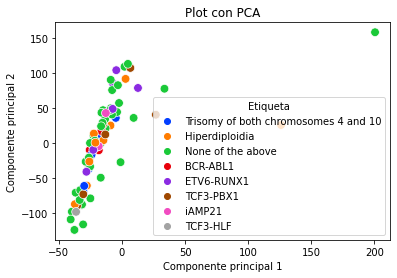

In [38]:
#Ploteo
sns.scatterplot(x='Componente principal 1', y='Componente principal 2', hue='Etiqueta', data=df_sin_fila_max, palette='bright', legend='full', s=75)
plt.title('Plot con PCA')
plt.savefig('plot_PCA_sinmax.png', dpi=300)
plt.show()

**Usando TSNE**

In [39]:
from sklearn.manifold import TSNE

tsne= TSNE(n_components = 2, random_state = 42)
dfBCCA_final_tsne= tsne.fit_transform(x_c)

In [40]:
dfBCCA_tsne = pd.DataFrame(dfBCCA_final_tsne, columns=['Dimensión 1', 'Dimensión 2'])

In [41]:
dfBCCA_tsne 

,Dimensión 1,Dimensión 2
0,0.605839,2.490844
1,0.447117,1.001359
2,-0.043493,0.051627
3,0.154972,2.186373
4,0.796434,3.179967
...,...,...
77,-0.624192,-0.107467
78,0.283683,-1.705332
79,-1.449249,4.141560
80,-3.157584,2.076235


In [42]:
dfBCCA_tsne ['Etiqueta'] = dfBCCA_final['ALL.Molecular.Subtype']
dfBCCA_tsne

,Dimensión 1,Dimensión 2,Etiqueta
0,0.605839,2.490844,Trisomy of both chromosomes 4 and 10
1,0.447117,1.001359,Hiperdiploidia
2,-0.043493,0.051627,Trisomy of both chromosomes 4 and 10
3,0.154972,2.186373,None of the above
4,0.796434,3.179967,BCR-ABL1
...,...,...,...
77,-0.624192,-0.107467,None of the above
78,0.283683,-1.705332,ETV6-RUNX1
79,-1.449249,4.141560,Trisomy of both chromosomes 4 and 10
80,-3.157584,2.076235,None of the above


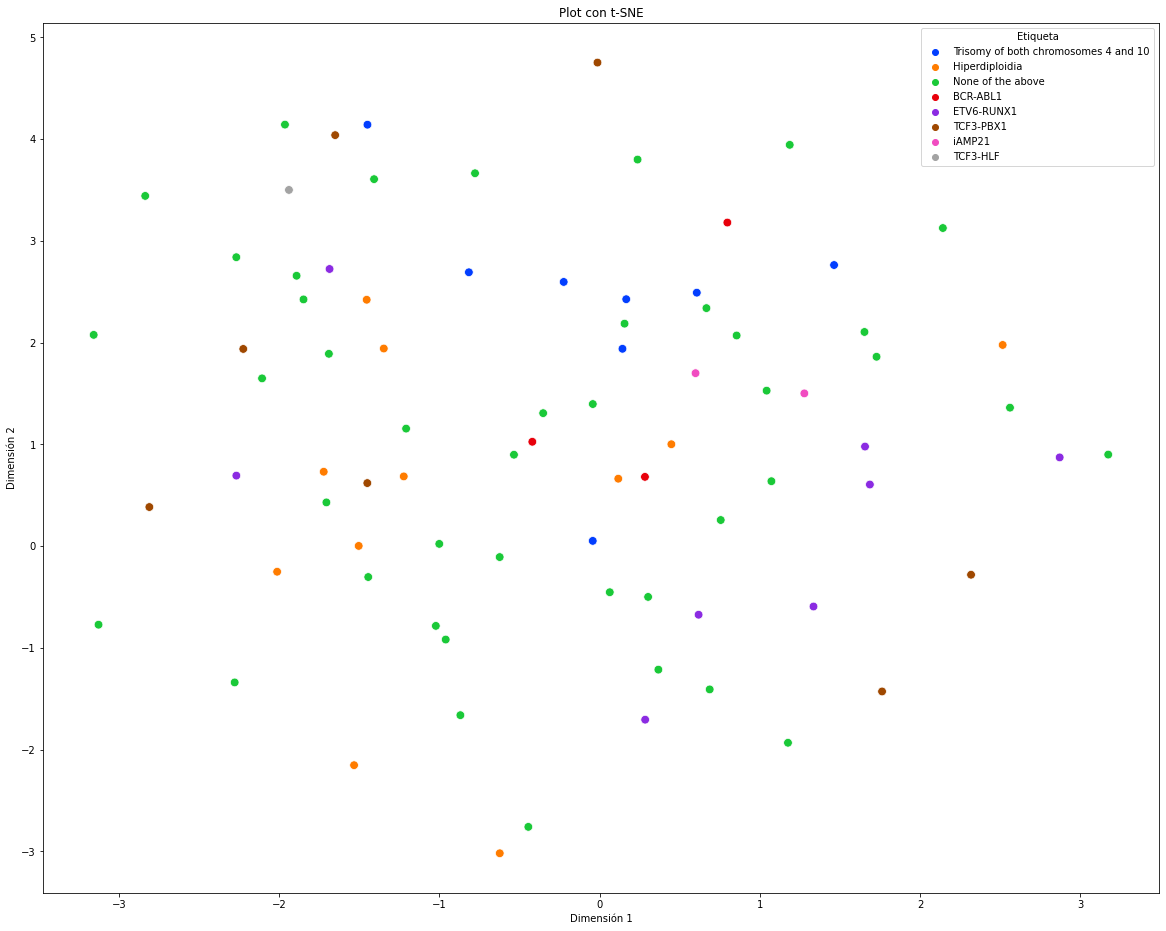

In [43]:
# Ploteando con t-SNE y colores diferenciables según sus etiquetas.
plt.figure(figsize=(20, 16))
sns.scatterplot(x='Dimensión 1', y='Dimensión 2', hue='Etiqueta', data=dfBCCA_tsne, palette='bright', legend='full', s=75)
plt.title('Plot con t-SNE')
plt.savefig('plot_tsne.png', dpi=300)
plt.show()

In [44]:
tsne= TSNE(n_components = 2, random_state = 42)
dfBCCA_final_tsne= tsne.fit_transform(x_c)
dfBCCA_tsne = pd.DataFrame(dfBCCA_final_tsne, columns=['Dimensión 1', 'Dimensión 2'])
dfBCCA_tsne

,Dimensión 1,Dimensión 2
0,0.605839,2.490844
1,0.447117,1.001359
2,-0.043493,0.051627
3,0.154972,2.186373
4,0.796434,3.179967
...,...,...
77,-0.624192,-0.107467
78,0.283683,-1.705332
79,-1.449249,4.141560
80,-3.157584,2.076235


In [45]:
dfBCCA_final_tsne

array([[ 6.0583901e-01,  2.4908445e+00],
       [ 4.4711691e-01,  1.0013595e+00],
       [-4.3493126e-02,  5.1626902e-02],
       [ 1.5497157e-01,  2.1863725e+00],
       [ 7.9643410e-01,  3.1799667e+00],
       [ 1.4623455e+00,  2.7625675e+00],
       [-1.0225418e+00, -7.8359461e-01],
       [ 2.1412528e+00,  3.1261311e+00],
       [-9.6091086e-01, -9.1792786e-01],
       [ 1.6520666e+00,  2.1046677e+00],
       [ 1.6551134e-01,  2.4266758e+00],
       [ 7.5517923e-01,  2.5656459e-01],
       [ 3.1730433e+00,  8.9976525e-01],
       [ 2.8226769e-01,  6.8078452e-01],
       [ 3.0201909e-01, -4.9895769e-01],
       [-1.0010736e+00,  2.2181455e-02],
       [ 1.3340085e+00, -5.9328049e-01],
       [-1.4443058e+00, -3.0353102e-01],
       [-1.2226932e+00,  6.8520367e-01],
       [-4.4532669e-01, -2.7588491e+00],
       [-4.2050886e-01,  1.0256109e+00],
       [ 1.1584272e-01,  6.6276419e-01],
       [-6.2368786e-01, -3.0182226e+00],
       [-2.2778208e+00, -1.3393822e+00],
       [ 1.07137

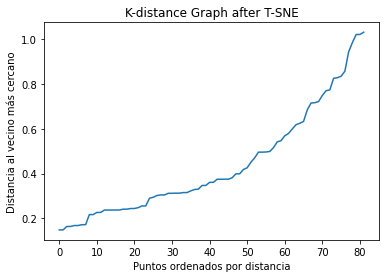

In [46]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
# Calcula la k-distancia gráfica después De Tsne
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(dfBCCA_final_tsne)
distances, indices = neighbors_fit.kneighbors(dfBCCA_final_tsne)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.title('K-distance Graph after T-SNE')
plt.show()

Varia de 0 a 1 vamos a hacer pasos pequeños para encontrar la mejor variable para eps

In [47]:
# Ajusta DBSCAN para diferentes valores de eps
eps_values = np.arange(0.1, 1, 0.025)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(dfBCCA_final_tsne)
    labels = dbscan.labels_
    
    # Muestra los resultados
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f'eps={eps}, Número de clusters={n_clusters}, Número de puntos de ruido={n_noise}')

eps=0.1, Número de clusters=0, Número de puntos de ruido=82
eps=0.125, Número de clusters=0, Número de puntos de ruido=82
eps=0.15, Número de clusters=0, Número de puntos de ruido=82
eps=0.175, Número de clusters=0, Número de puntos de ruido=82
eps=0.19999999999999998, Número de clusters=0, Número de puntos de ruido=82
eps=0.22499999999999998, Número de clusters=0, Número de puntos de ruido=82
eps=0.24999999999999997, Número de clusters=0, Número de puntos de ruido=82
eps=0.27499999999999997, Número de clusters=0, Número de puntos de ruido=82
eps=0.29999999999999993, Número de clusters=0, Número de puntos de ruido=82
eps=0.32499999999999996, Número de clusters=0, Número de puntos de ruido=82
eps=0.35, Número de clusters=0, Número de puntos de ruido=82
eps=0.3749999999999999, Número de clusters=0, Número de puntos de ruido=82
eps=0.3999999999999999, Número de clusters=0, Número de puntos de ruido=82
eps=0.42499999999999993, Número de clusters=0, Número de puntos de ruido=82
eps=0.449999

eps=0.75 parece ser el que mejor se acomoda

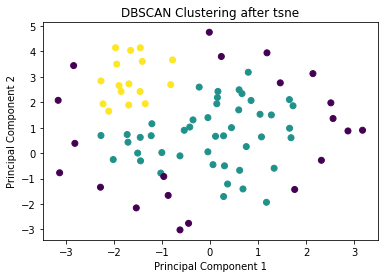

In [48]:
# Aplica DBSCAN después de tsne... min_samples=5 parece ser bueno
dbscan = DBSCAN(eps=0.75, min_samples=5) 
labels = dbscan.fit_predict(dfBCCA_final_tsne)

# Visualiza los resultados de DBSCAN
plt.scatter(dfBCCA_final_tsne[:, 0], dfBCCA_final_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after tsne')
plt.show()

In [55]:
dfBCCA_tsne ['Etiqueta'] = dfBCCA_final['ALL.Molecular.Subtype']
dfBCCA_tsne

,Dimensión 1,Dimensión 2,Etiqueta
0,0.605839,2.490844,Trisomy of both chromosomes 4 and 10
1,0.447117,1.001359,Hiperdiploidia
2,-0.043493,0.051627,Trisomy of both chromosomes 4 and 10
3,0.154972,2.186373,None of the above
4,0.796434,3.179967,BCR-ABL1
...,...,...,...
77,-0.624192,-0.107467,None of the above
78,0.283683,-1.705332,ETV6-RUNX1
79,-1.449249,4.141560,Trisomy of both chromosomes 4 and 10
80,-3.157584,2.076235,None of the above


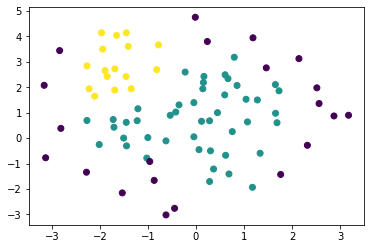

In [58]:
# Aplicar DBSCAN para agrupar los puntos
dbscan = DBSCAN(eps=0.75, min_samples=5)
dfBCCA_tsne['cluster'] = dbscan.fit_predict(dfBCCA_tsne[['Dimensión 1', 'Dimensión 2']])
# Crear un gráfico de dispersión
plt.scatter(dfBCCA_tsne['Dimensión 1'], dfBCCA_tsne['Dimensión 2'], c=dfBCCA_tsne['cluster'], cmap='viridis')

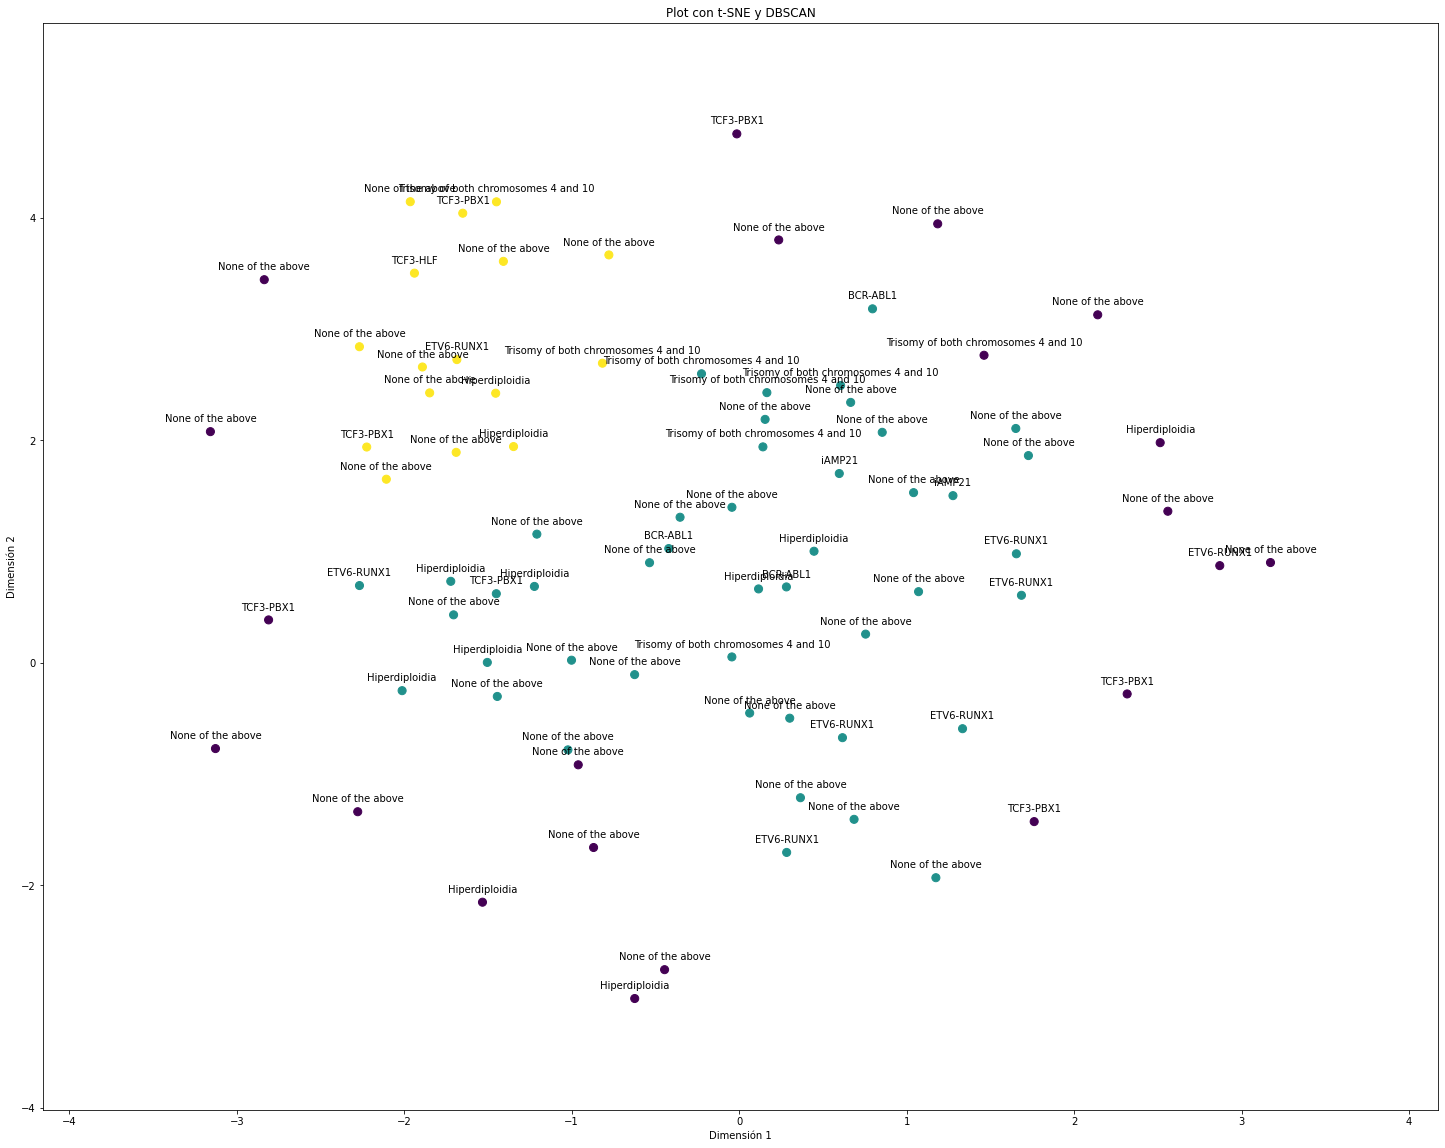

In [98]:
plt.figure(figsize=(25, 20))
# Crear un gráfico de dispersión
plt.scatter(dfBCCA_tsne['Dimensión 1'], dfBCCA_tsne['Dimensión 2'], c=dfBCCA_tsne['cluster'], cmap='viridis',s=65)

# Etiquetar los puntos con los nombres de las etiquetas
for x, y, label in zip(dfBCCA_tsne['Dimensión 1'], dfBCCA_tsne['Dimensión 2'], dfBCCA_tsne['Etiqueta']):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Ajustar los límites del gráfico
plt.xlim(min(dfBCCA_tsne['Dimensión 1']) - 1, max(dfBCCA_tsne['Dimensión 1']) + 1)
plt.ylim(min(dfBCCA_tsne['Dimensión 2']) - 1, max(dfBCCA_tsne['Dimensión 2']) + 1)

# Añadir etiquetas a los ejes
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Plot con t-SNE y DBSCAN')
plt.savefig('plot_tsne_DBSCAN.png', dpi=300)
plt.show()


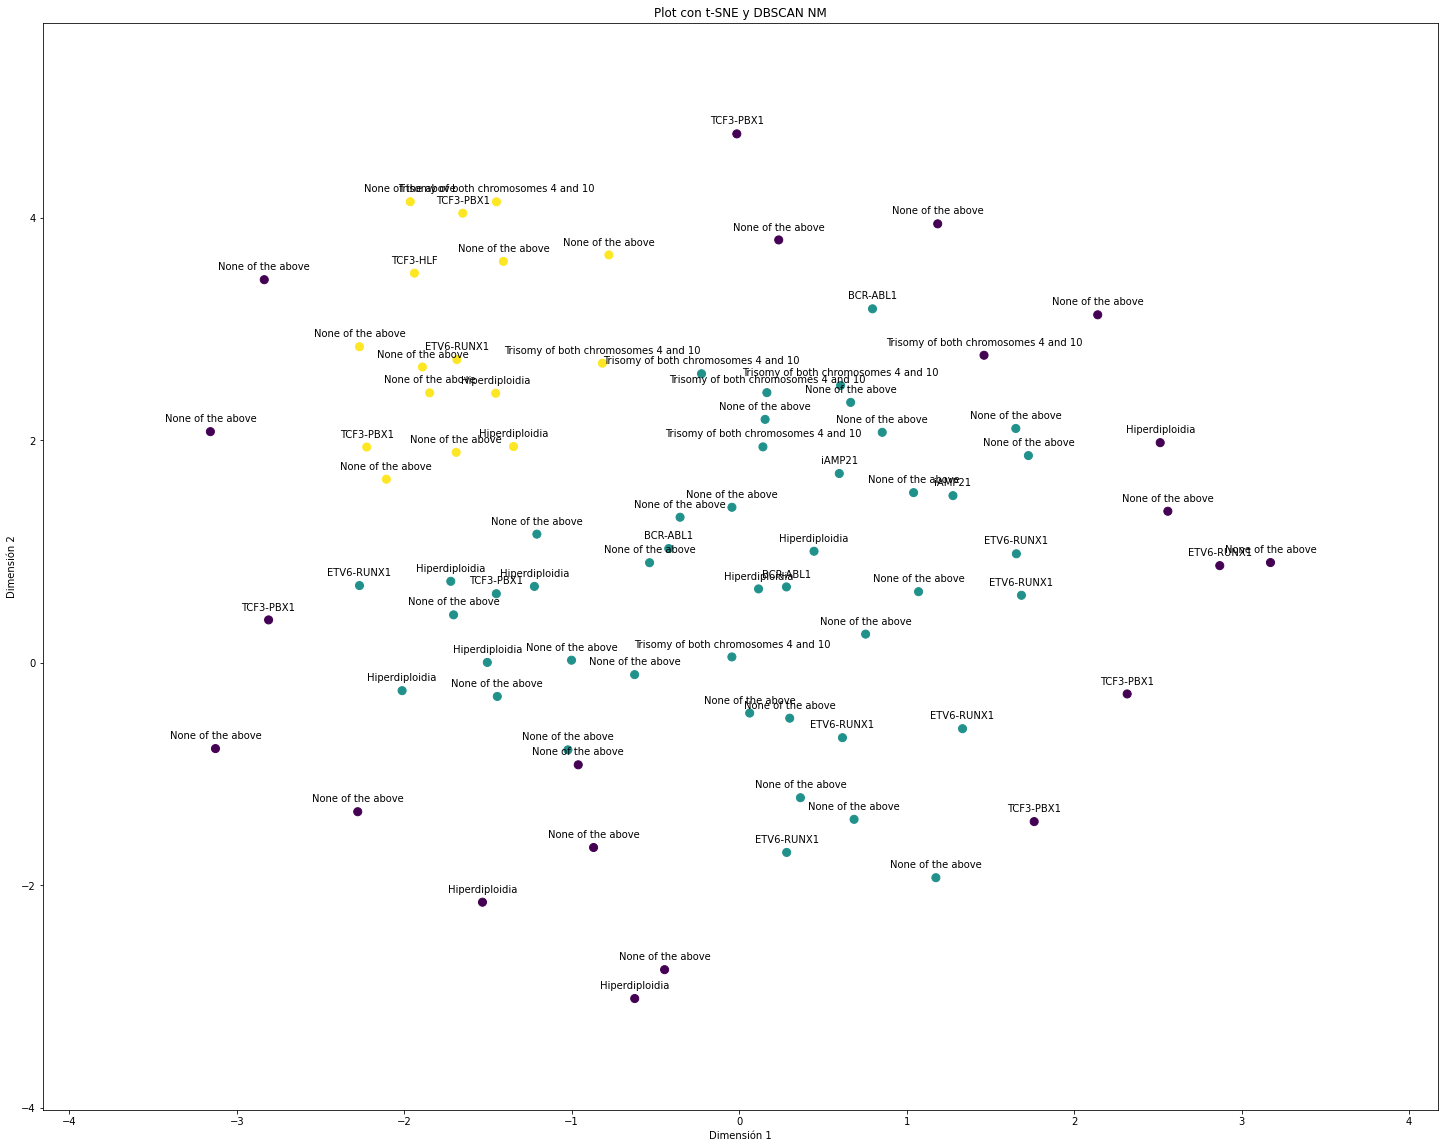

In [95]:
plt.figure(figsize=(25, 20))
# Crear un gráfico de dispersión
plt.scatter(dfBCCA_tsne['Dimensión 1'], dfBCCA_tsne['Dimensión 2'], c=dfBCCA_tsne['cluster'], cmap='viridis',s=65)

# Etiquetar los puntos con los nombres de las etiquetas
for x, y, label in zip(dfBCCA_tsne['Dimensión 1'], dfBCCA_tsne['Dimensión 2'], dfBCCA_tsne['Etiqueta']):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Ajustar los límites del gráfico
plt.xlim(min(dfBCCA_tsne['Dimensión 1']) - 1, max(dfBCCA_tsne['Dimensión 1']) + 1)
plt.ylim(min(dfBCCA_tsne['Dimensión 2']) - 1, max(dfBCCA_tsne['Dimensión 2']) + 1)

# Añadir etiquetas a los ejes
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Plot con t-SNE y DBSCAN NM')
#
plt.show()

In [49]:
# Ploteando con t-SNE y colores diferenciables según sus etiquetas.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimensión 1', y='Dimensión 2', hue='Etiqueta', data=dfBCCA_tsne, palette='bright', legend='full', s=75)
plt.title('Plot con t-SNE')
plt.savefig('plot_tsne.png', dpi=300)
plt.show()

ValueError: Could not interpret value `Etiqueta` for parameter `hue`

<Figure size 720x576 with 0 Axes>

In [48]:
dfBCCA_tsne_C=dfBCCA_tsne.copy()

In [49]:
# Aplicar DBSCAN comparando etiquetas. 
dbscan = DBSCAN(eps=0.75, min_samples=5) 
labels = dbscan.fit_predict(dfBCCA_final_tsne)

# Agregar las etiquetas predichas al DataFrame
dfBCCA_tsne_C['predicted_label'] = labels

In [50]:
dfBCCA_tsne_C

,Dimensión 1,Dimensión 2,Etiqueta,predicted_label
0,0.605839,2.490844,Trisomy of both chromosomes 4 and 10,0
1,0.447117,1.001359,Hiperdiploidia,0
2,-0.043493,0.051627,Trisomy of both chromosomes 4 and 10,0
3,0.154972,2.186373,None of the above,0
4,0.796434,3.179967,BCR-ABL1,0
...,...,...,...,...
77,-0.624192,-0.107467,None of the above,0
78,0.283683,-1.705332,ETV6-RUNX1,0
79,-1.449249,4.141560,Trisomy of both chromosomes 4 and 10,1
80,-3.157584,2.076235,None of the above,-1


In [51]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Codificar las etiquetas de strings a valores numéricos
label_encoder = LabelEncoder()
dfBCCA_tsne_C['label_numeric'] = label_encoder.fit_transform(dfBCCA_tsne_C['Etiqueta'])
dfBCCA_tsne_C

,Dimensión 1,Dimensión 2,Etiqueta,predicted_label,label_numeric
0,0.605839,2.490844,Trisomy of both chromosomes 4 and 10,0,6
1,0.447117,1.001359,Hiperdiploidia,0,2
2,-0.043493,0.051627,Trisomy of both chromosomes 4 and 10,0,6
3,0.154972,2.186373,None of the above,0,3
4,0.796434,3.179967,BCR-ABL1,0,0
...,...,...,...,...,...
77,-0.624192,-0.107467,None of the above,0,3
78,0.283683,-1.705332,ETV6-RUNX1,0,1
79,-1.449249,4.141560,Trisomy of both chromosomes 4 and 10,1,6
80,-3.157584,2.076235,None of the above,-1,3


In [52]:
df_tsne_C=dfBCCA_tsne_C.copy()

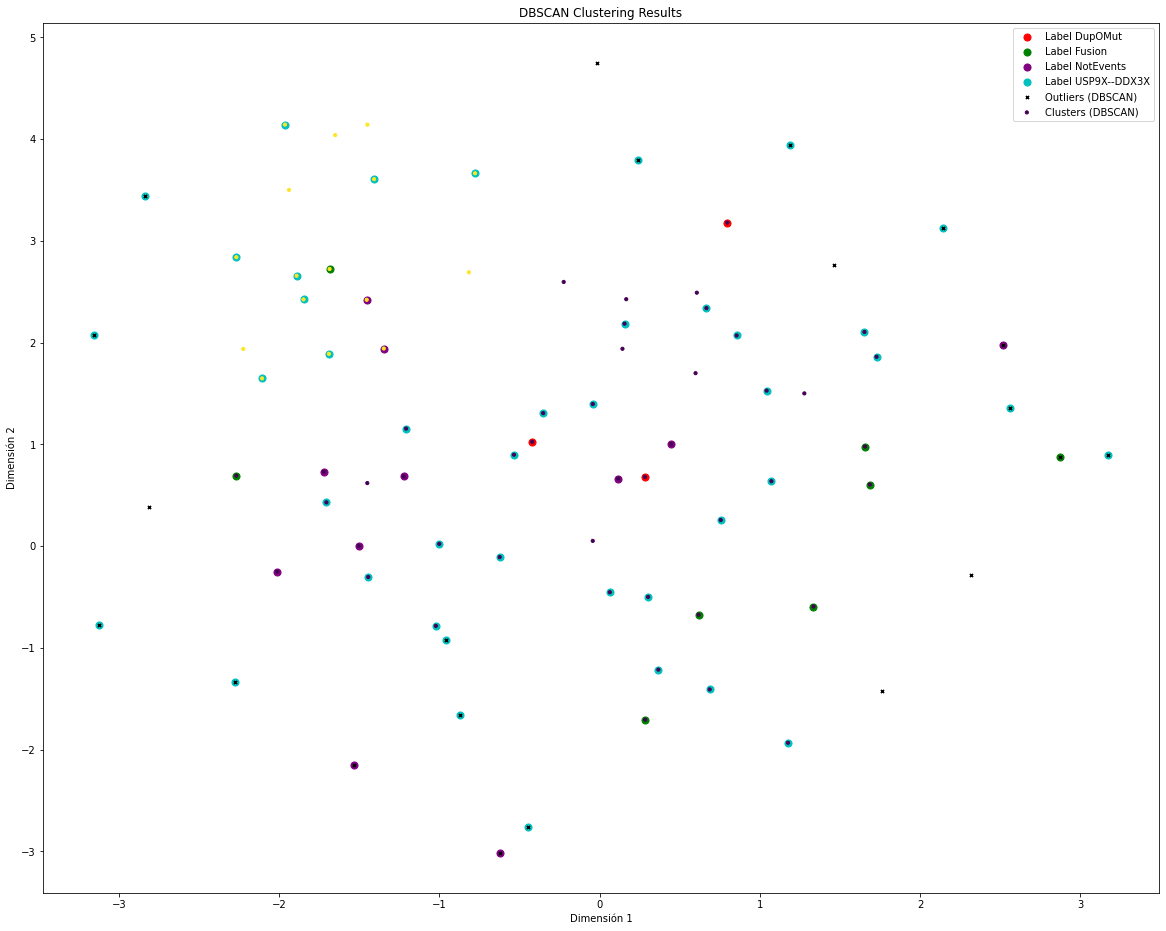

In [53]:
# Visualizar el resultado
plt.figure(figsize=(20, 16))

# Scatter plot para las etiquetas reales
plt.scatter(df_tsne_C['Dimensión 1'][df_tsne_C['label_numeric'] == 0], df_tsne_C['Dimensión 2'][df_tsne_C['label_numeric'] == 0], color='r', label='Label DupOMut',s=50)
plt.scatter(df_tsne_C['Dimensión 1'][df_tsne_C['label_numeric'] == 1], df_tsne_C['Dimensión 2'][df_tsne_C['label_numeric'] == 1], color='g', label='Label Fusion',s=50)
plt.scatter(df_tsne_C['Dimensión 1'][df_tsne_C['label_numeric'] == 2], df_tsne_C['Dimensión 2'][df_tsne_C['label_numeric'] == 2], color='purple', label='Label NotEvents',s=50)
plt.scatter(df_tsne_C['Dimensión 1'][df_tsne_C['label_numeric'] == 3], df_tsne_C['Dimensión 2'][df_tsne_C['label_numeric'] == 3], color='c', label='Label USP9X--DDX3X',s=50)

# Scatter plot para las etiquetas predichas por DBSCAN
plt.scatter(df_tsne_C['Dimensión 1'][df_tsne_C['predicted_label'] == -1], df_tsne_C['Dimensión 2'][df_tsne_C['predicted_label'] == -1], color='black' , marker='x', label='Outliers (DBSCAN)',s=10)
plt.scatter(df_tsne_C['Dimensión 1'][df_tsne_C['predicted_label'] != -1], df_tsne_C['Dimensión 2'][df_tsne_C['predicted_label'] != -1], c=df_tsne_C['predicted_label'][df_tsne_C['predicted_label'] != -1], cmap='viridis', label='Clusters (DBSCAN)',s=10)

plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('DBSCAN Clustering Results')
plt.legend()
plt.show()

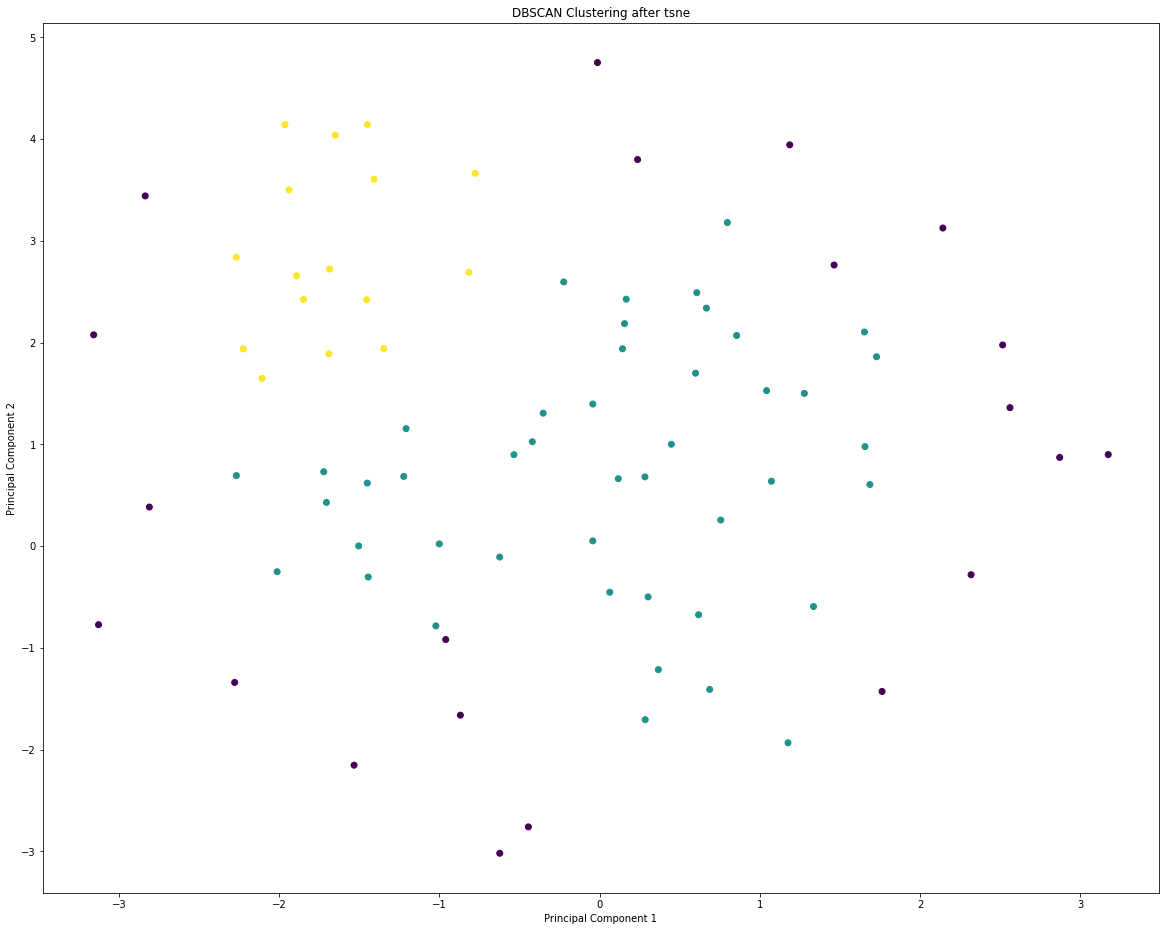

In [91]:
# Aplica DBSCAN después de tsne... min_samples=5 parece ser bueno
dbscan = DBSCAN(eps=0.75, min_samples=5) 
labels = dbscan.fit_predict(dfBCCA_final_tsne)

# Visualiza los resultados de DBSCAN
plt.figure(figsize=(20, 16))
plt.scatter(dfBCCA_final_tsne[:, 0], dfBCCA_final_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after tsne')
plt.show()

In [54]:
# Aplica DBSCAN después de tsne... min_samples=5 parece ser bueno
dbscan = DBSCAN(eps=0.75, min_samples=5) 
labels = dbscan.fit_predict(dfBCCA_final_tsne)

In [55]:
x_c

array([[ 1.3735707 ,  0.22486042, -0.50625939, ...,  1.86750183,
        -0.16795709,  3.50993117],
       [-0.93836401, -0.66037027,  0.1588284 , ..., -0.15622191,
         0.60224647,  1.66248523],
       [ 0.21740171, -1.06510134, -0.5944105 , ..., -0.15622191,
        -0.16795709,  0.30772839],
       ...,
       [ 3.06447288,  3.82844272,  1.61483222, ...,  1.86498163,
        -0.16795709, -0.5088828 ],
       [-1.2686404 , -0.56333045, -0.6392223 , ..., -0.15622191,
        -0.16795709, -0.53083255],
       [-0.41960022,  2.42495179,  1.47420333, ..., -0.15622191,
        -0.16795709, -0.11032149]])

In [56]:
datos_escalados=x_c

In [57]:
tsne= TSNE(n_components = 2, random_state = 123)
dfBCCA_final_tsne= tsne.fit_transform(x_c)
dfBCCA_tsne = pd.DataFrame(dfBCCA_final_tsne, columns=['Dimensión 1', 'Dimensión 2'])
dfBCCA_tsne

,Dimensión 1,Dimensión 2
0,-0.577304,-0.345240
1,-1.409594,0.885138
2,-1.979377,1.829560
3,-0.330903,0.213672
4,-0.149547,-0.837716
...,...,...
77,-1.098733,2.536844
78,-2.195217,3.654038
79,1.721561,-0.553194
80,2.186558,2.286433


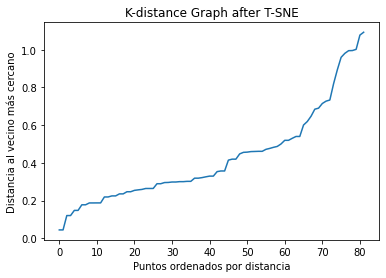

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
# Calcula la k-distancia gráfica después De Tsne
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(dfBCCA_final_tsne)
distances, indices = neighbors_fit.kneighbors(dfBCCA_final_tsne)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.title('K-distance Graph after T-SNE')
plt.show()

In [59]:
# Ajusta DBSCAN para diferentes valores de eps
eps_values = np.arange(0.1, 1, 0.025)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(dfBCCA_final_tsne)
    labels = dbscan.labels_
    
    # Muestra los resultados
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f'eps={eps}, Número de clusters={n_clusters}, Número de puntos de ruido={n_noise}')

eps=0.1, Número de clusters=0, Número de puntos de ruido=82
eps=0.125, Número de clusters=0, Número de puntos de ruido=82
eps=0.15, Número de clusters=0, Número de puntos de ruido=82
eps=0.175, Número de clusters=0, Número de puntos de ruido=82
eps=0.19999999999999998, Número de clusters=0, Número de puntos de ruido=82
eps=0.22499999999999998, Número de clusters=0, Número de puntos de ruido=82
eps=0.24999999999999997, Número de clusters=0, Número de puntos de ruido=82
eps=0.27499999999999997, Número de clusters=0, Número de puntos de ruido=82
eps=0.29999999999999993, Número de clusters=0, Número de puntos de ruido=82
eps=0.32499999999999996, Número de clusters=0, Número de puntos de ruido=82
eps=0.35, Número de clusters=0, Número de puntos de ruido=82
eps=0.3749999999999999, Número de clusters=0, Número de puntos de ruido=82
eps=0.3999999999999999, Número de clusters=0, Número de puntos de ruido=82
eps=0.42499999999999993, Número de clusters=0, Número de puntos de ruido=82
eps=0.449999

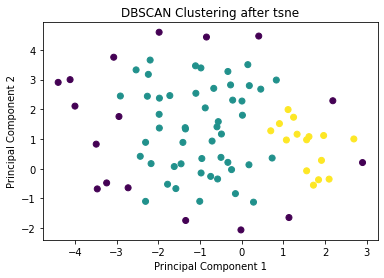

In [60]:
# Aplica DBSCAN después de tsne... min_samples=5 parece ser bueno
dbscan = DBSCAN(eps=0.85, min_samples=5) 
labels = dbscan.fit_predict(dfBCCA_final_tsne)

# Visualiza los resultados de DBSCAN
plt.scatter(dfBCCA_final_tsne[:, 0], dfBCCA_final_tsne[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after tsne')
plt.show()

In [61]:
dfBCCA_tsne ['Etiqueta'] = dfBCCA_final['ALL.Molecular.Subtype']
dfBCCA_tsne

,Dimensión 1,Dimensión 2,Etiqueta
0,-0.577304,-0.345240,Trisomy of both chromosomes 4 and 10
1,-1.409594,0.885138,Hiperdiploidia
2,-1.979377,1.829560,Trisomy of both chromosomes 4 and 10
3,-0.330903,0.213672,None of the above
4,-0.149547,-0.837716,BCR-ABL1
...,...,...,...
77,-1.098733,2.536844,None of the above
78,-2.195217,3.654038,ETV6-RUNX1
79,1.721561,-0.553194,Trisomy of both chromosomes 4 and 10
80,2.186558,2.286433,None of the above


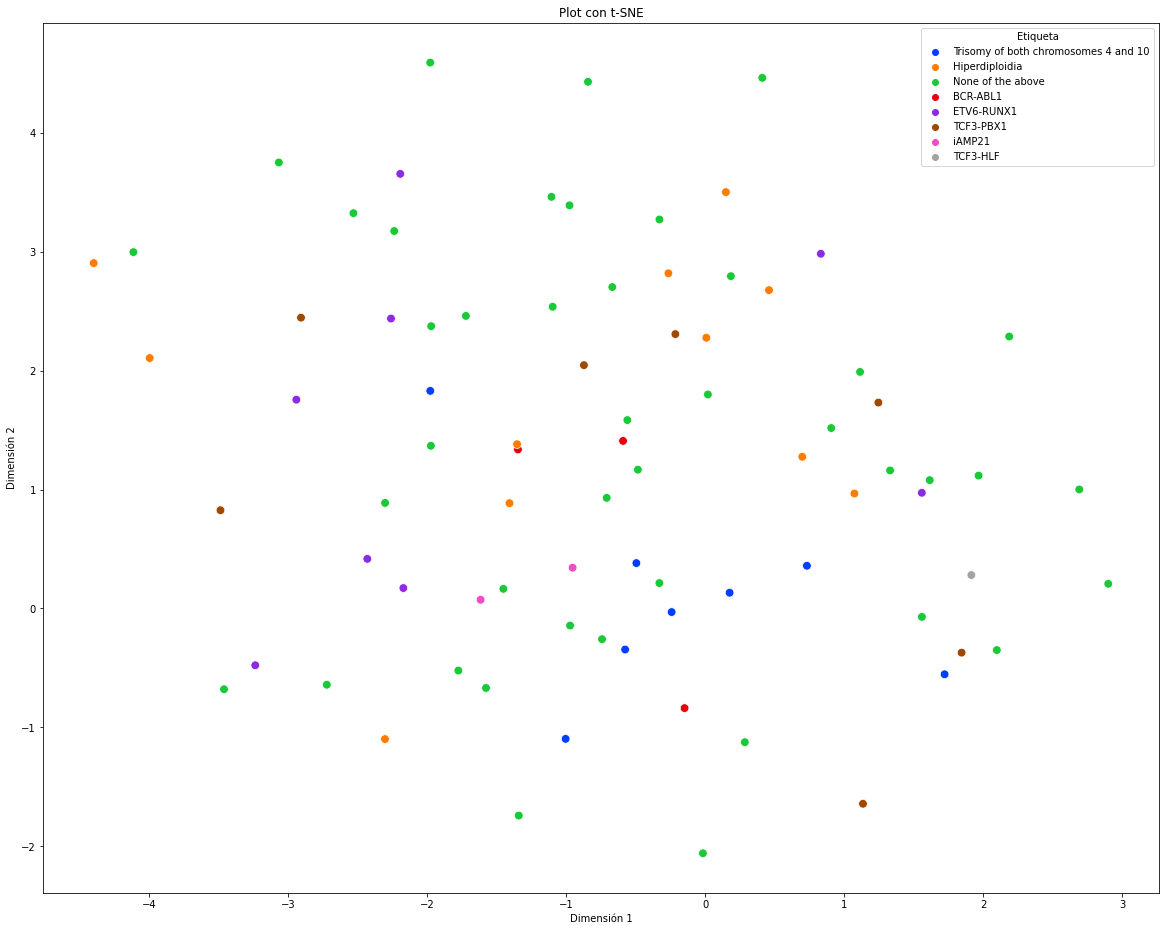

In [62]:
# Ploteando con t-SNE y colores diferenciables según sus etiquetas.
plt.figure(figsize=(20, 16))
sns.scatterplot(x='Dimensión 1', y='Dimensión 2', hue='Etiqueta', data=dfBCCA_tsne, palette='bright', legend='full', s=75)
plt.title('Plot con t-SNE')
plt.savefig('plot_tsne.png', dpi=300)
plt.show()

In [108]:
# Aplicar t-SNE
tsne = TSNE(n_components=3, random_state=42)
dfBCCA_final_tsne= tsne.fit_transform(x_c)
dfBCCA_tsne = pd.DataFrame(dfBCCA_final_tsne, columns=['Dim1', 'Dim2', 'Dim3'])
dfBCCA_tsne

,Dim1,Dim2,Dim3
0,-43.827816,-23.340725,62.274750
1,-90.453606,6.498474,-82.870781
2,-102.004242,-65.321350,-13.656647
3,68.082649,7.732310,-19.697088
4,95.540855,71.771484,-24.000528
...,...,...,...
77,117.838737,-25.119331,-2.275984
78,97.020386,-78.595787,-10.352483
79,14.739387,-10.697457,94.703354
80,-7.274034,68.534515,46.268150


In [110]:
dfBCCA_tsne ['Etiqueta'] = dfBCCA_final['ALL.Molecular.Subtype']
dfBCCA_tsne

,Dim1,Dim2,Dim3,Etiqueta
0,-43.827816,-23.340725,62.274750,Trisomy of both chromosomes 4 and 10
1,-90.453606,6.498474,-82.870781,Hiperdiploidia
2,-102.004242,-65.321350,-13.656647,Trisomy of both chromosomes 4 and 10
3,68.082649,7.732310,-19.697088,None of the above
4,95.540855,71.771484,-24.000528,BCR-ABL1
...,...,...,...,...
77,117.838737,-25.119331,-2.275984,None of the above
78,97.020386,-78.595787,-10.352483,ETV6-RUNX1
79,14.739387,-10.697457,94.703354,Trisomy of both chromosomes 4 and 10
80,-7.274034,68.534515,46.268150,None of the above


In [117]:
dfBCCA_tsne [['Etiqueta']].value_counts()

Etiqueta                            
None of the above                       42
Hiperdiploidia                          11
ETV6-RUNX1                               8
Trisomy of both chromosomes 4 and 10     8
TCF3-PBX1                                7
BCR-ABL1                                 3
iAMP21                                   2
TCF3-HLF                                 1
Name: count, dtype: int64

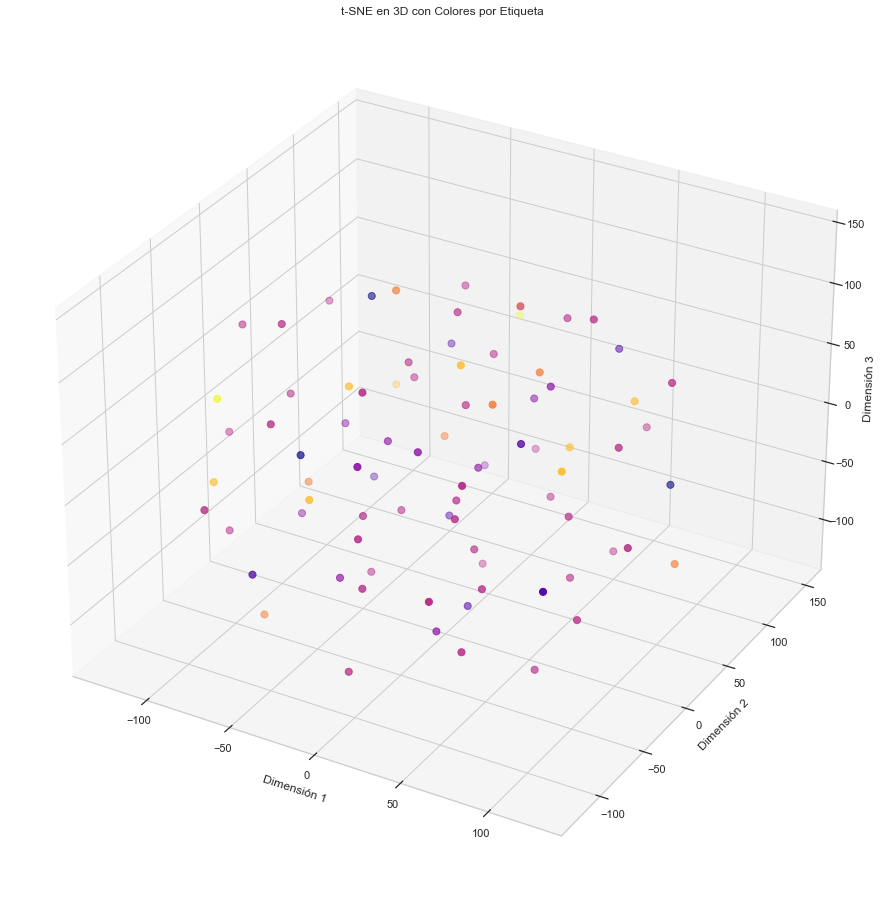

In [128]:
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear un gráfico de dispersión en 3D
fig = plt.figure(figsize=(20, 16))
ax = fig.add_subplot(111, projection='3d')

# Utilizar scatter para crear el gráfico
ax.scatter(dfBCCA_tsne['Dim1'], dfBCCA_tsne['Dim2'], dfBCCA_tsne['Dim3'], c=dfBCCA_tsne['Etiqueta'].astype('category').cat.codes, cmap = 'plasma', s=50)

# Configurar etiquetas y título
ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.set_zlabel('Dimensión 3')
ax.set_title('t-SNE en 3D con Colores por Etiqueta')

# Agregar barra de colores con etiquetas
cbar = fig.colorbar(scatter)
cbar.set_ticks(dfBCCA_tsne['Etiqueta'].astype('category').cat.codes.unique())
cbar.set_ticklabels(dfBCCA_tsne['Etiqueta'].unique())
cbar.set_label('Etiqueta')

plt.show()

In [91]:
#x=x_c
x

array([[ 1.3735707 ,  0.22486042, -0.50625939, ...,  1.86750183,
        -0.16795709,  3.50993117],
       [-0.93836401, -0.66037027,  0.1588284 , ..., -0.15622191,
         0.60224647,  1.66248523],
       [ 0.21740171, -1.06510134, -0.5944105 , ..., -0.15622191,
        -0.16795709,  0.30772839],
       ...,
       [ 3.06447288,  3.82844272,  1.61483222, ...,  1.86498163,
        -0.16795709, -0.5088828 ],
       [-1.2686404 , -0.56333045, -0.6392223 , ..., -0.15622191,
        -0.16795709, -0.53083255],
       [-0.41960022,  2.42495179,  1.47420333, ..., -0.15622191,
        -0.16795709, -0.11032149]])

**usando isomap**

In [92]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

n_components = 2  # Número de componentes para la proyección
n_neighbors = 5   # Número de vecinos para el cálculo de geodésica

isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
data_projected = isomap.fit_transform(x)  # Ajusta y transforma los datos

In [93]:
#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dfBCCA_Final_isomap = pd.DataFrame(data = data_projected
            , columns = ['Componente principal 1', 'Componente principal 2'])
principal_dfBCCA_Final_isomap

,Componente principal 1,Componente principal 2
0,-189.785559,-52.215598
1,14.004020,29.759323
2,160.661912,-2.844172
3,-176.004433,-32.874300
4,-55.233839,-105.020916
...,...,...
77,75.166293,89.478553
78,383.113035,-207.503090
79,-184.171189,96.266916
80,-115.371437,410.183284


In [80]:
principal_dfBCCA_Final_isomap["Etiqueta"]=dfBCCA_final['ALL.Molecular.Subtype']

In [81]:
principal_dfBCCA_Final_isomap

,Componente principal 1,Componente principal 2,Etiqueta
0,-189.785559,-52.215598,Trisomy of both chromosomes 4 and 10
1,14.004020,29.759323,Hiperdiploidia
2,160.661912,-2.844172,Trisomy of both chromosomes 4 and 10
3,-176.004433,-32.874300,None of the above
4,-55.233839,-105.020916,BCR-ABL1
...,...,...,...
77,75.166293,89.478553,None of the above
78,383.113035,-207.503090,ETV6-RUNX1
79,-184.171189,96.266916,Trisomy of both chromosomes 4 and 10
80,-115.371437,410.183284,None of the above


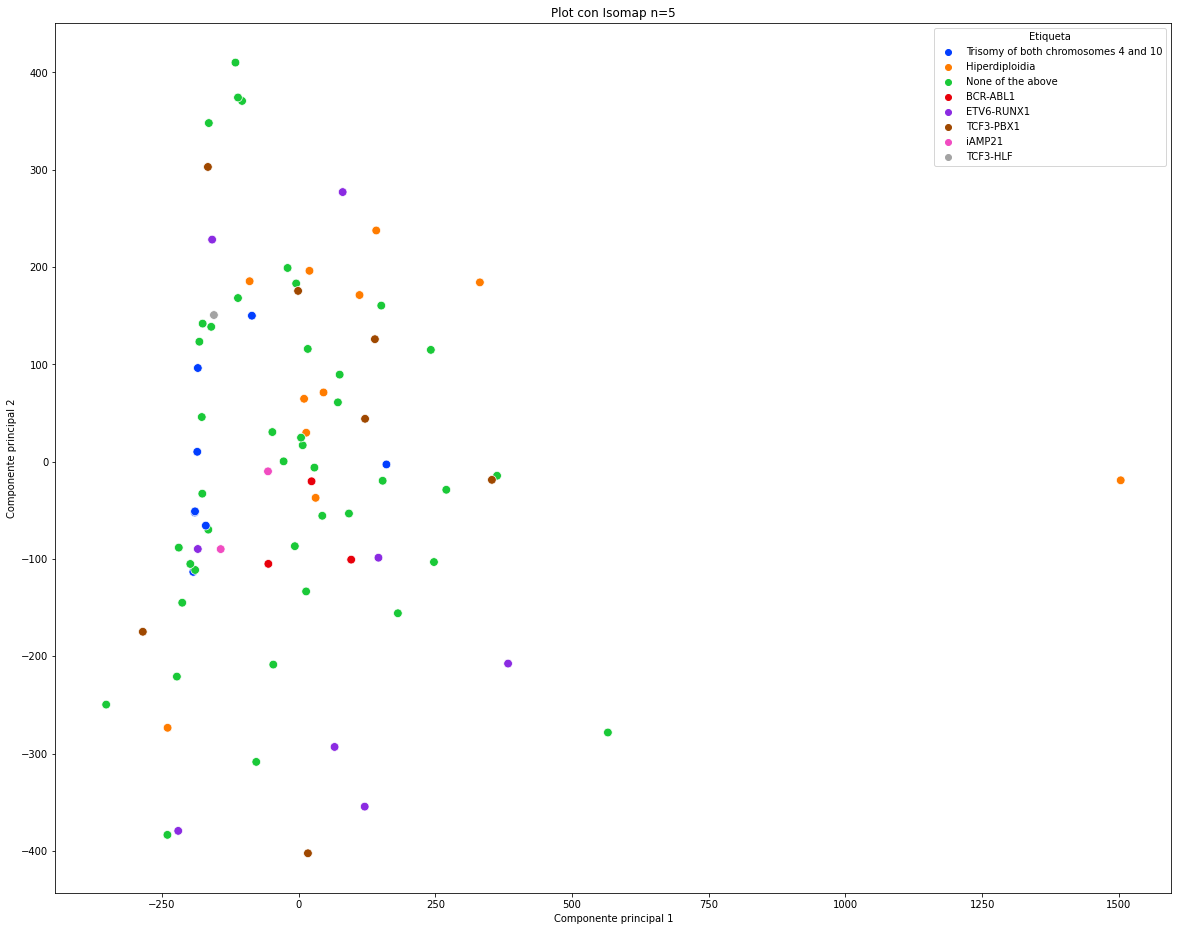

In [71]:
# Ploteando con isomap y colores diferenciables según sus etiquetas.
plt.figure(figsize=(20, 16))
sns.scatterplot(x='Componente principal 1', y='Componente principal 2', hue='Etiqueta', data=principal_dfBCCA_Final_isomap, palette='bright', legend='full', s=75)
plt.title('Plot con Isomap n=5')
plt.savefig('plot_Isomap_n=5.png', dpi=300)
plt.show()

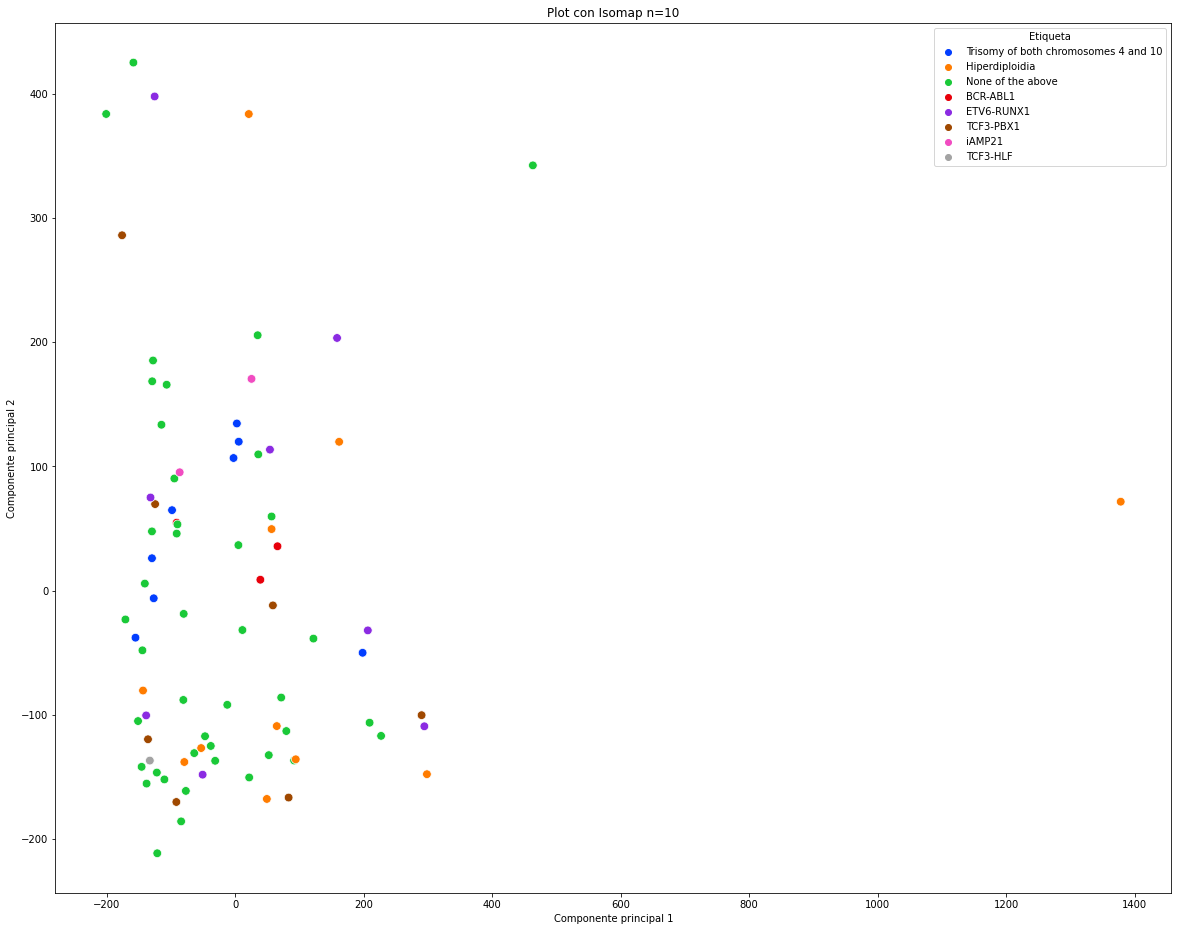

In [75]:
#n=8
n_components = 2  # Número de componentes para la proyección
n_neighbors = 8   # Número de vecinos para el cálculo de geodésica

isomap = Isomap(n_components=n_components, n_neighbors=n_neighbors)
data_projected = isomap.fit_transform(x)  # Ajusta y transforma los datos

#creemos un DataFrame que tendrá los valores de los componentes principales para las 34 muestras.
principal_dfBCCA_Final_isomap = pd.DataFrame(data = data_projected
            , columns = ['Componente principal 1', 'Componente principal 2'])
#pegamos etiquetas
principal_dfBCCA_Final_isomap["Etiqueta"]=dfBCCA_final['ALL.Molecular.Subtype']

# Ploteando con isomap y colores diferenciables según sus etiquetas.
plt.figure(figsize=(20, 16))
sns.scatterplot(x='Componente principal 1', y='Componente principal 2', hue='Etiqueta', data=principal_dfBCCA_Final_isomap, palette='bright', legend='full', s=75)
plt.title('Plot con Isomap n=10')
plt.savefig('plot_Isomap_n=10.png', dpi=300)
plt.show()

In [73]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsClassifier

# Cargar el conjunto de datos
digits = load_digits()
X = x
y = dfBCCA_final['ALL.Molecular.Subtype']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros para la búsqueda de la mejor 'n_neighbors'
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Instanciar el modelo Isomap
isomap = Isomap()

# Instanciar el clasificador k-vecinos más cercanos
knn = KNeighborsClassifier()

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Aplicar Isomap y búsqueda de hiperparámetros
grid_search.fit(isomap.fit_transform(X_train), y_train)

# Obtener el mejor valor para 'n_neighbors'
best_n_neighbors = grid_search.best_params_['n_neighbors']

print("El mejor valor para 'n_neighbors' es:", best_n_neighbors)


El mejor valor para 'n_neighbors' es: 5


C:\Users\Jesus Eduardo\.julia\conda\3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [74]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsClassifier

# Cargar el conjunto de datos
digits = load_digits()
X = x
y = dfBCCA_final['ALL.Molecular.Subtype']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros para la búsqueda de la mejor 'n_neighbors'
param_grid = {'n_neighbors': [2, 3, 4, 6, 7, 8, 9, 10]}

# Instanciar el modelo Isomap
isomap = Isomap()

# Instanciar el clasificador k-vecinos más cercanos
knn = KNeighborsClassifier()

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Aplicar Isomap y búsqueda de hiperparámetros
grid_search.fit(isomap.fit_transform(X_train), y_train)

# Obtener el mejor valor para 'n_neighbors'
best_n_neighbors = grid_search.best_params_['n_neighbors']

print("El mejor valor para 'n_neighbors' es:", best_n_neighbors)


El mejor valor para 'n_neighbors' es: 8


C:\Users\Jesus Eduardo\.julia\conda\3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [76]:
data_projected

array([[   2.43597699,  134.62950799],
       [ 161.66523543,  119.87283669],
       [ 198.18886469,  -50.05430731],
       [ -91.24541404,   45.96230222],
       [ -91.34492225,   54.71294541],
       [ -98.51512151,   64.80884919],
       [  91.55946183, -136.8098246 ],
       [-201.05375438,  383.90353755],
       [  52.09013733, -132.49434467],
       [ -94.90721968,   90.3167966 ],
       [  -2.77510029,  106.80833364],
       [  56.44886608,   59.71753073],
       [-158.68612708,  425.29955067],
       [  65.67940758,   35.73509092],
       [ 121.63496121,  -38.62030956],
       [  79.42920461, -113.09215425],
       [ 158.41347126,  203.49922356],
       [ -38.17841378, -125.0948656 ],
       [  64.55723297, -109.08953185],
       [ 463.26805219,  342.50596666],
       [  39.00410847,    8.78380682],
       [  56.45274179,   49.56964832],
       [1378.52957006,   71.63335972],
       [ -63.92757463, -130.86809375],
       [ -90.08010003,   53.35269988],
       [ -77.0208241 , -1

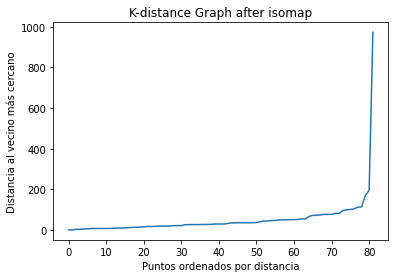

In [82]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
# Calcula la k-distancia gráfica después De isomap
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(data_projected)
distances, indices = neighbors_fit.kneighbors(data_projected)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.title('K-distance Graph after isomap')
plt.show()

In [84]:
# Ajusta DBSCAN para diferentes valores de eps
eps_values = np.arange(1, 400, 10)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(data_projected)
    labels = dbscan.labels_
    
    # Muestra los resultados
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f'eps={eps}, Número de clusters={n_clusters}, Número de puntos de ruido={n_noise}')

eps=1, Número de clusters=0, Número de puntos de ruido=82
eps=11, Número de clusters=0, Número de puntos de ruido=82
eps=21, Número de clusters=0, Número de puntos de ruido=82
eps=31, Número de clusters=1, Número de puntos de ruido=71
eps=41, Número de clusters=3, Número de puntos de ruido=54
eps=51, Número de clusters=3, Número de puntos de ruido=50
eps=61, Número de clusters=3, Número de puntos de ruido=43
eps=71, Número de clusters=3, Número de puntos de ruido=33
eps=81, Número de clusters=2, Número de puntos de ruido=22
eps=91, Número de clusters=2, Número de puntos de ruido=19
eps=101, Número de clusters=1, Número de puntos de ruido=18
eps=111, Número de clusters=1, Número de puntos de ruido=11
eps=121, Número de clusters=1, Número de puntos de ruido=8
eps=131, Número de clusters=1, Número de puntos de ruido=7
eps=141, Número de clusters=1, Número de puntos de ruido=5
eps=151, Número de clusters=1, Número de puntos de ruido=3
eps=161, Número de clusters=1, Número de puntos de ruid

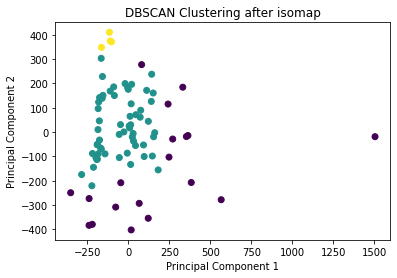

In [109]:
# Aplica DBSCAN después de isomap... min_samples=5 parece ser bueno
dbscan = DBSCAN(eps=91, min_samples=5) 
labels = dbscan.fit_predict(data_projected)

# Visualiza los resultados de DBSCAN
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after isomap')
plt.show()

In [86]:
pip install umap-learn

  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86845 sha256=546e57bb2c6637d0c1f7c219648bb5ff8d3efad5bf63a9d777564d01a66e50a9
  Stored in directory: c:\users\jesus eduardo\appdata\local\pip\cache\wheels\0f\01\17\26951217a11fb724b7027c6dd5b620b6d368104f7e6d4171fc
Successfully built umap-learn
Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import matplotlib.pyplot as plt

In [73]:
x_c

array([[ 1.3735707 ,  0.22486042, -0.50625939, ...,  1.86750183,
        -0.16795709,  3.50993117],
       [-0.93836401, -0.66037027,  0.1588284 , ..., -0.15622191,
         0.60224647,  1.66248523],
       [ 0.21740171, -1.06510134, -0.5944105 , ..., -0.15622191,
        -0.16795709,  0.30772839],
       ...,
       [ 3.06447288,  3.82844272,  1.61483222, ...,  1.86498163,
        -0.16795709, -0.5088828 ],
       [-1.2686404 , -0.56333045, -0.6392223 , ..., -0.15622191,
        -0.16795709, -0.53083255],
       [-0.41960022,  2.42495179,  1.47420333, ..., -0.15622191,
        -0.16795709, -0.11032149]])

In [74]:
umap = UMAP(n_components=2, n_jobs=1, random_state=42)
X_umap = umap.fit_transform(x_c)

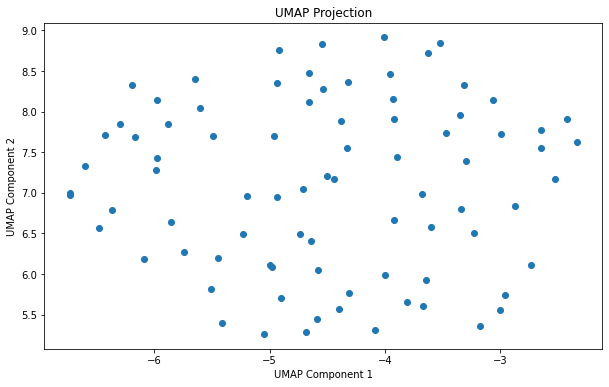

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.title('UMAP Projection')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

In [76]:
dfBCCA_umap = pd.DataFrame(X_umap, columns=['Dimensión 1', 'Dimensión 2'])

In [77]:
dfBCCA_umap

,Dimensión 1,Dimensión 2
0,-5.044336,5.260610
1,-5.232638,6.495407
2,-3.893600,7.441506
3,-5.444911,6.190671
4,-4.738307,6.489683
...,...,...
77,-4.380470,7.881474
78,-2.424314,7.912288
79,-6.482079,6.565361
80,-5.977667,8.139446


In [78]:
dfBCCA_umap['Etiqueta'] = dfBCCA_final['ALL.Molecular.Subtype']
dfBCCA_umap

,Dimensión 1,Dimensión 2,Etiqueta
0,-5.044336,5.260610,Trisomy of both chromosomes 4 and 10
1,-5.232638,6.495407,Hiperdiploidia
2,-3.893600,7.441506,Trisomy of both chromosomes 4 and 10
3,-5.444911,6.190671,None of the above
4,-4.738307,6.489683,BCR-ABL1
...,...,...,...
77,-4.380470,7.881474,None of the above
78,-2.424314,7.912288,ETV6-RUNX1
79,-6.482079,6.565361,Trisomy of both chromosomes 4 and 10
80,-5.977667,8.139446,None of the above


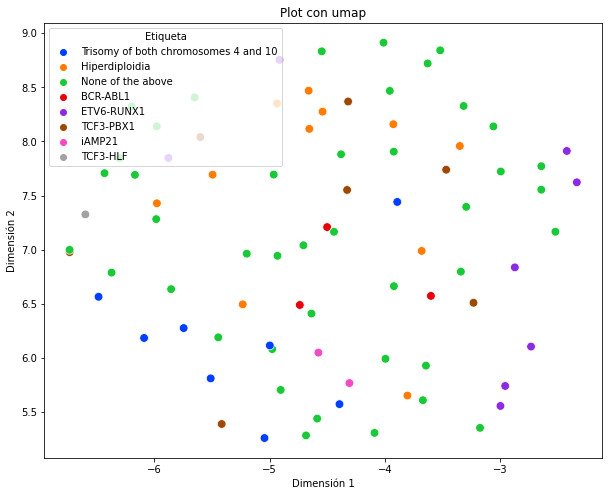

In [79]:
# Ploteando con IMAP y colores diferenciables según sus etiquetas.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimensión 1', y='Dimensión 2', hue='Etiqueta', data=dfBCCA_umap, palette='bright', legend='full', s=75)
plt.title('Plot con umap')
plt.savefig('plot_umap.png', dpi=300)
plt.show()

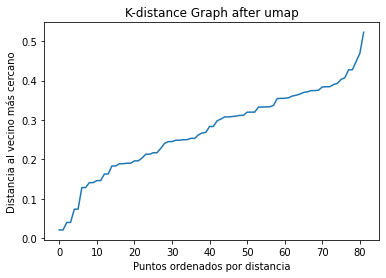

In [80]:
# Calcula la k-distancia gráfica después De umap
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_umap)
distances, indices = neighbors_fit.kneighbors(X_umap)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.xlabel('Puntos ordenados por distancia')
plt.ylabel('Distancia al vecino más cercano')
plt.title('K-distance Graph after umap')
plt.show()

In [81]:
# Ajusta DBSCAN para diferentes valores de eps
eps_values = np.arange(0.1, 0.6, 0.025)
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(X_umap)
    labels = dbscan.labels_
    
    # Muestra los resultados
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    print(f'eps={eps}, Número de clusters={n_clusters}, Número de puntos de ruido={n_noise}')

eps=0.1, Número de clusters=0, Número de puntos de ruido=82
eps=0.125, Número de clusters=0, Número de puntos de ruido=82
eps=0.15, Número de clusters=0, Número de puntos de ruido=82
eps=0.175, Número de clusters=0, Número de puntos de ruido=82
eps=0.19999999999999998, Número de clusters=0, Número de puntos de ruido=82
eps=0.22499999999999998, Número de clusters=0, Número de puntos de ruido=82
eps=0.24999999999999997, Número de clusters=0, Número de puntos de ruido=82
eps=0.27499999999999997, Número de clusters=0, Número de puntos de ruido=82
eps=0.29999999999999993, Número de clusters=0, Número de puntos de ruido=82
eps=0.32499999999999996, Número de clusters=0, Número de puntos de ruido=82
eps=0.35, Número de clusters=1, Número de puntos de ruido=77
eps=0.3749999999999999, Número de clusters=3, Número de puntos de ruido=66
eps=0.3999999999999999, Número de clusters=4, Número de puntos de ruido=60
eps=0.42499999999999993, Número de clusters=5, Número de puntos de ruido=47
eps=0.449999

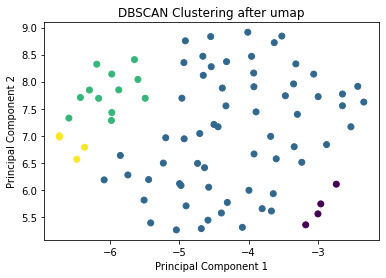

In [82]:
# Aplica DBSCAN después de umap... min_samples=5 parece ser bueno
#eps=0.55
dbscan = DBSCAN(eps=0.55, min_samples=5) 
labels = dbscan.fit_predict(X_umap)

# Visualiza los resultados de DBSCAN
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after umap')
plt.show()

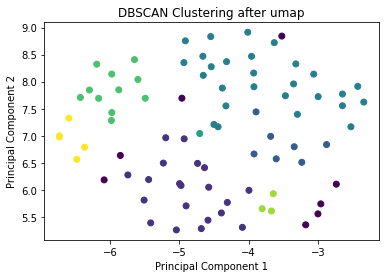

In [83]:
# Aplica DBSCAN después de umap... min_samples=5 parece ser bueno
#eps=0.5
dbscan = DBSCAN(eps=0.5, min_samples=5) 
labels = dbscan.fit_predict(X_umap)

# Visualiza los resultados de DBSCAN
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering after umap')
plt.show()

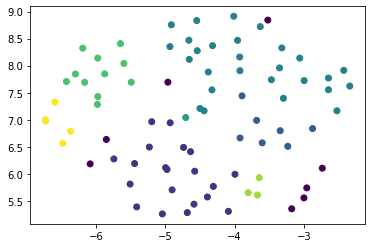

In [84]:
# Aplicar DBSCAN para agrupar los puntos
dbscan = DBSCAN(eps=0.5, min_samples=5) 
dfBCCA_umap['cluster'] = dbscan.fit_predict(dfBCCA_umap[['Dimensión 1', 'Dimensión 2']])
# Crear un gráfico de dispersión
plt.scatter(dfBCCA_umap['Dimensión 1'], dfBCCA_umap['Dimensión 2'], c=dfBCCA_umap['cluster'], cmap='viridis')

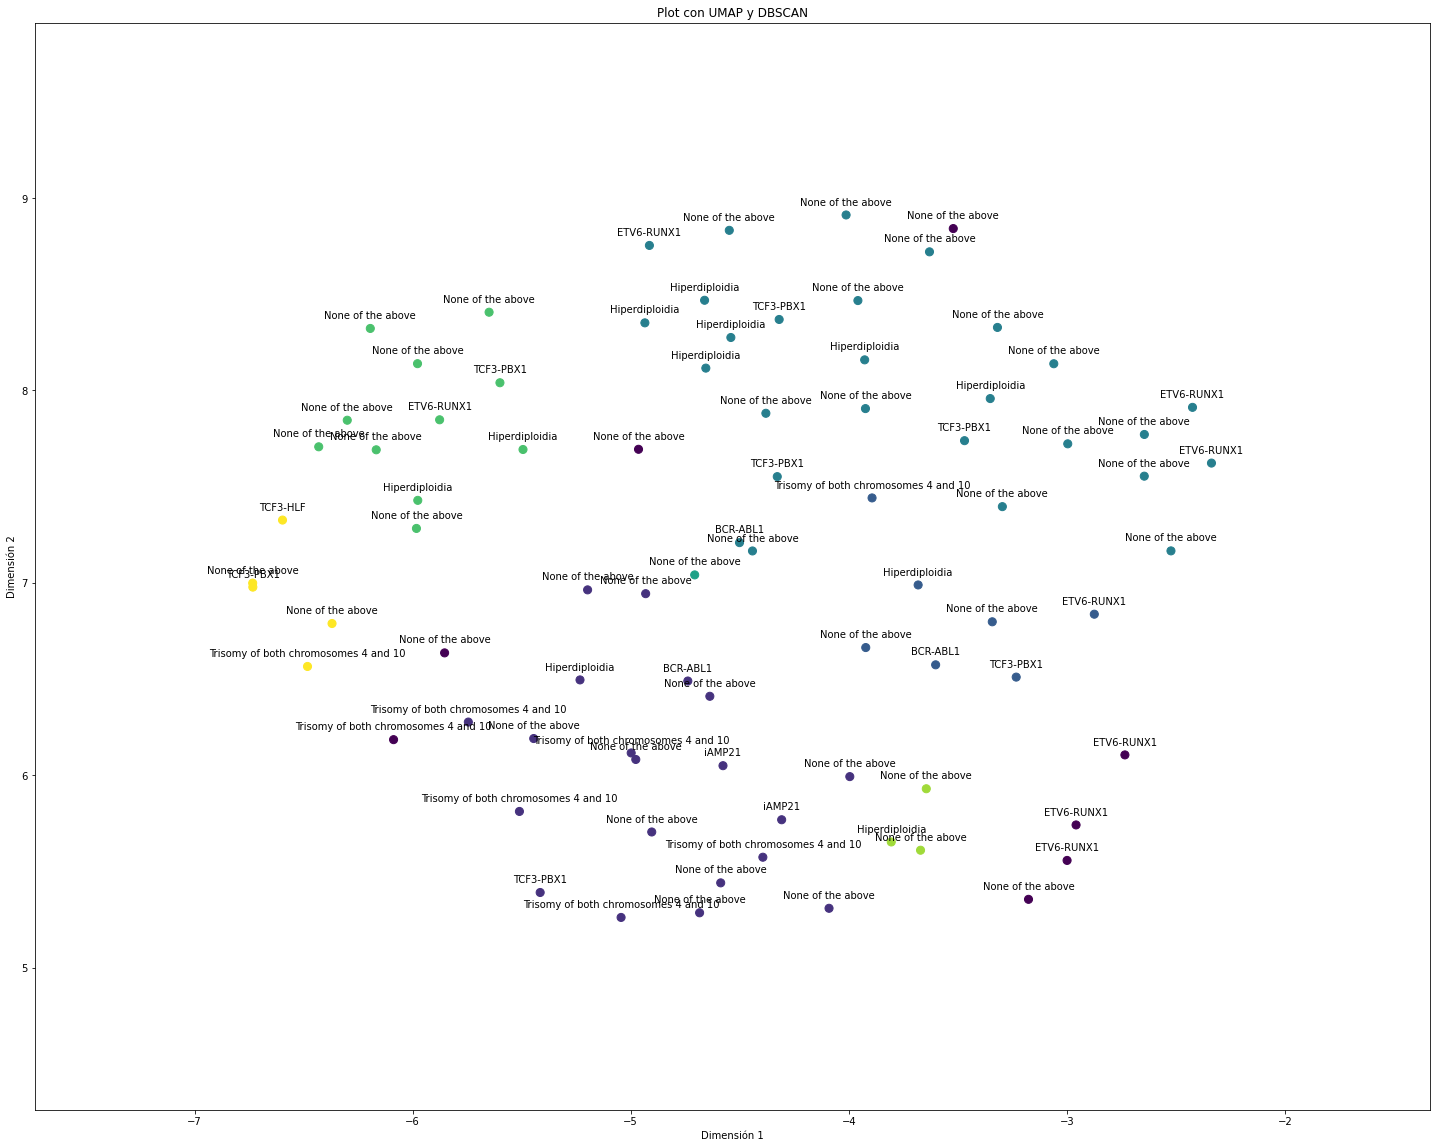

In [97]:
plt.figure(figsize=(25, 20))
# Crear un gráfico de dispersión
plt.scatter(dfBCCA_umap['Dimensión 1'], dfBCCA_umap['Dimensión 2'], c=dfBCCA_umap['cluster'], cmap='viridis',s=65)

# Etiquetar los puntos con los nombres de las etiquetas
for x, y, label in zip(dfBCCA_umap['Dimensión 1'], dfBCCA_umap['Dimensión 2'], dfBCCA_umap['Etiqueta']):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Ajustar los límites del gráfico
plt.xlim(min(dfBCCA_umap['Dimensión 1']) - 1, max(dfBCCA_umap['Dimensión 1']) + 1)
plt.ylim(min(dfBCCA_umap['Dimensión 2']) - 1, max(dfBCCA_umap['Dimensión 2']) + 1)

# Añadir etiquetas a los ejes
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Plot con UMAP y DBSCAN')
plt.savefig('plot_UMAP_DBSCAN.png', dpi=200)
plt.show()

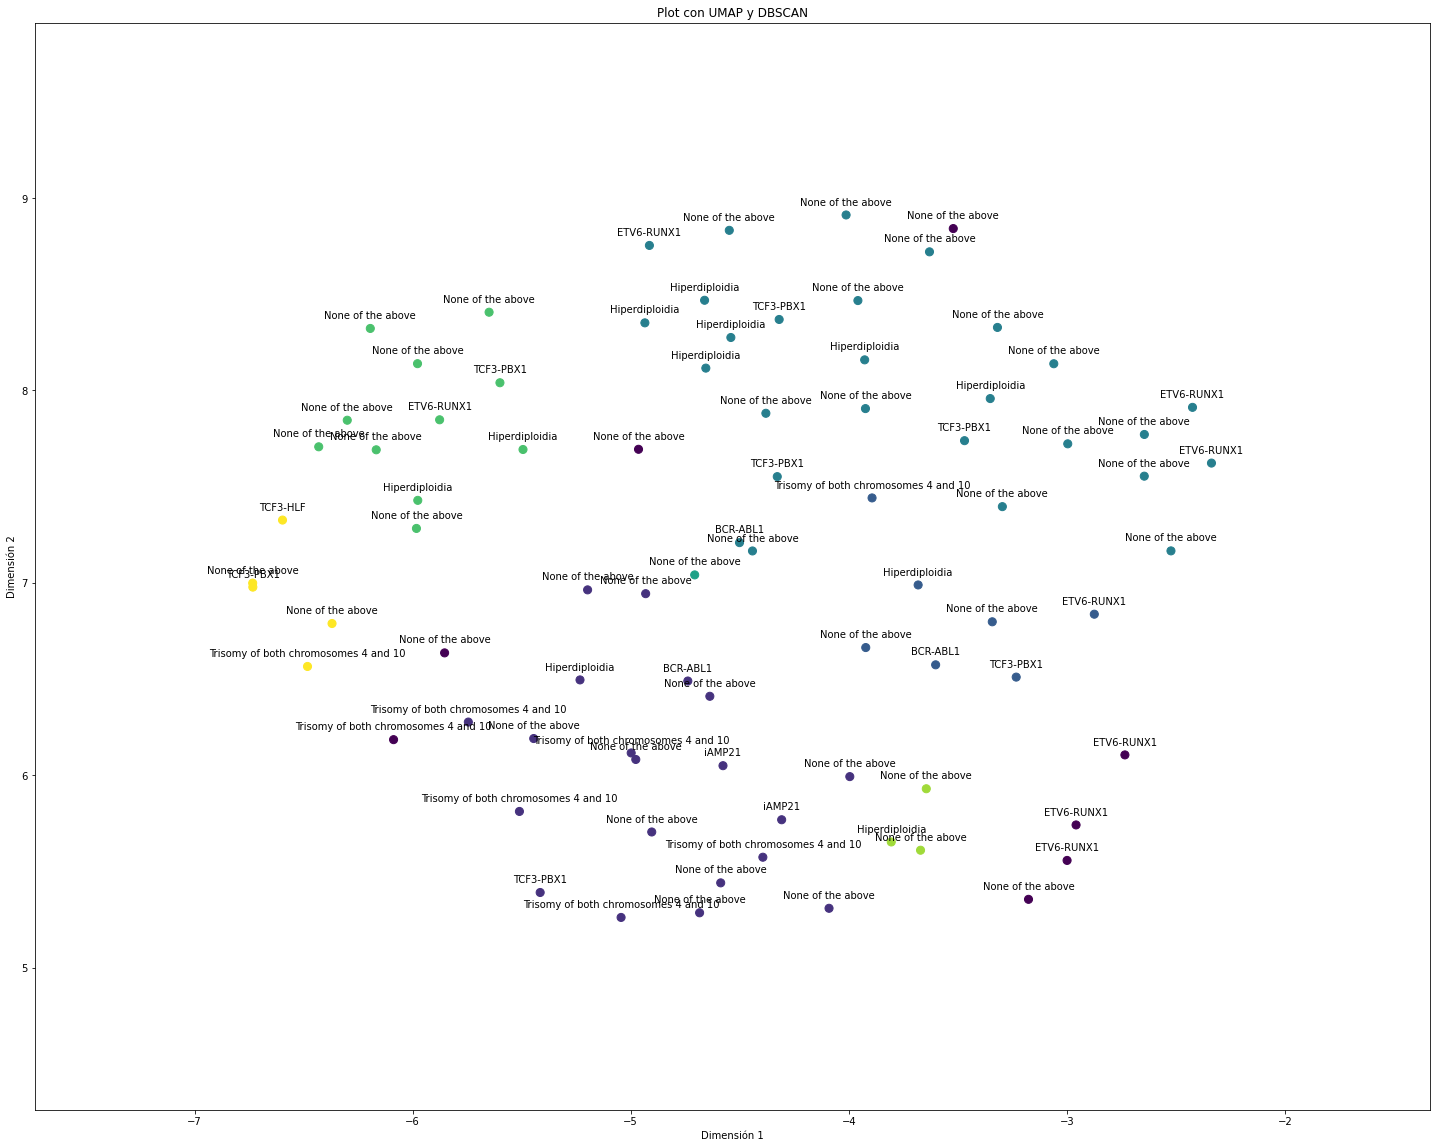

In [96]:
plt.figure(figsize=(25, 20))
# Crear un gráfico de dispersión
plt.scatter(dfBCCA_umap['Dimensión 1'], dfBCCA_umap['Dimensión 2'], c=dfBCCA_umap['cluster'], cmap='viridis',s=65)

# Etiquetar los puntos con los nombres de las etiquetas
for x, y, label in zip(dfBCCA_umap['Dimensión 1'], dfBCCA_umap['Dimensión 2'], dfBCCA_umap['Etiqueta']):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Ajustar los límites del gráfico
plt.xlim(min(dfBCCA_umap['Dimensión 1']) - 1, max(dfBCCA_umap['Dimensión 1']) + 1)
plt.ylim(min(dfBCCA_umap['Dimensión 2']) - 1, max(dfBCCA_umap['Dimensión 2']) + 1)

# Añadir etiquetas a los ejes
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Plot con UMAP y DBSCAN')
#
plt.show()

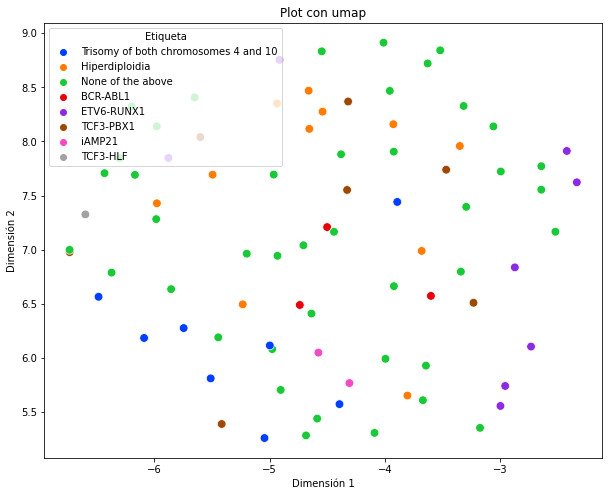

In [107]:
# Ploteando con t-SNE y colores diferenciables según sus etiquetas.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimensión 1', y='Dimensión 2', hue='Etiqueta', data=dfBCCA_umap, palette='bright', legend='full', s=75)
plt.title('Plot con umap')
plt.savefig('plot_umap.png', dpi=300)
plt.show()